#Referências

https://www.scielosp.org/pdf/rsp/2011.v45n2/432-435

https://www.riuni.unisul.br/bitstream/handle/12345/5373/Rafael%20Martins%20TCC%20PDFA.pdf?sequence=1&isAllowed=y

http://www.abergo.org.br/revista/index.php/ae/article/view/721/302

http://bdm.unb.br/bitstream/10483/1601/1/2009_StefanSanti.pdf

http://repositorio.unb.br/bitstream/10482/20533/1/2016_RafaelMedeirosHespanhol.pdf

https://pt.wikipedia.org/wiki/Testes_de_hip%C3%B3teses

# Análise dos dados de condições meteorológicas e ocorrências aeronáuticas

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from math import radians, cos, sin, asin, sqrt 

%matplotlib inline

In [0]:
df_ocorrencias = pd.read_csv('gdrive/My Drive/projetos/lp/oco.csv', sep='~', header=0,\
         usecols=['codigo_ocorrencia','ocorrencia_classificacao', 'ocorrencia_tipo', 'ocorrencia_uf',\
                 'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_horario', 'ocorrencia_dia'])

print(df_ocorrencias.head(5))
print(df_ocorrencias.shape)

   codigo_ocorrencia ocorrencia_classificacao  ... ocorrencia_dia  ocorrencia_horario
0    201305055424986                 ACIDENTE  ...     2013-05-05            11:00:00
1    201805021421302                INCIDENTE  ...     2018-03-09            22:40:00
2    201605160250139          INCIDENTE GRAVE  ...     2016-05-13            19:19:00
3    201311259977425          INCIDENTE GRAVE  ...     2013-11-25            12:32:00
4    200808073991179                 ACIDENTE  ...     2008-08-07            15:10:00

[5 rows x 8 columns]
(5733, 8)


In [0]:
df_ocorrencias_sudeste = df_ocorrencias.loc[df_ocorrencias['ocorrencia_uf'].isin(['ES','MG','RJ','SP'])]

print(df_ocorrencias_sudeste.head(5))
print(df_ocorrencias_sudeste.shape)

    codigo_ocorrencia  ... ocorrencia_horario
21    201609131430542  ...           14:10:00
22    201212272090341  ...           16:03:00
23    200906128607729  ...           14:50:00
24    201408227604299  ...           14:30:00
25    200801159627220  ...           11:41:00

[5 rows x 8 columns]
(2536, 8)


In [0]:
df_fatores_contribuintes = pd.read_csv('gdrive/My Drive/projetos/lp/ftc.csv', sep='~', header=0,\
        usecols=['codigo_ocorrencia', 'fator_nome'])

print(df_fatores_contribuintes.head(5))
print(df_fatores_contribuintes.shape)

   codigo_ocorrencia               fator_nome
0    200801041545367      INDISCIPLINA DE VOO
1    200801041545367                INSTRUÇÃO
2    200801041545367   MANUTENÇÃO DE AERONAVE
3    200801041545367              OUTRO FATOR
4    200801058203864  JULGAMENTO DE PILOTAGEM
(4800, 2)


In [0]:
df_aeronaves_envolvidas = pd.read_csv('gdrive/My Drive/projetos/lp/anv.csv', sep='~', header=0,\
        usecols=['codigo_ocorrencia', 'aeronave_tipo_veiculo', 'aeronave_fabricante',\
                'aeronave_modelo', 'aeronave_motor_tipo', 'aeronave_motor_quantidade',\
                        'aeronave_ano_fabricacao', 'aeronave_tipo_operacao', 'total_fatalidades'])

print(df_aeronaves_envolvidas.head(5))
print(df_aeronaves_envolvidas.shape)

   codigo_ocorrencia  ... total_fatalidades
0    201106142171203  ...                 0
1    200804256669287  ...                 0
2    201205209591320  ...                 0
3    201012015549851  ...                 0
4    201708190325167  ...                 0

[5 rows x 9 columns]
(5794, 9)


In [0]:
df_ocorrencias_fatores_sudeste = pd.merge(df_ocorrencias_sudeste, df_fatores_contribuintes, on='codigo_ocorrencia', how='inner')

print(df_ocorrencias_fatores_sudeste.head(5))
print(df_ocorrencias_fatores_sudeste.shape)
#print(df_ocorrencias_fatores_sudeste.describe())

   codigo_ocorrencia  ...                         fator_nome
0    200801159627220  ...                            ATITUDE
1    200801159627220  ...       CULTURA DO GRUPO DE TRABALHO
2    200801159627220  ...          CARACTERÍSTICAS DA TAREFA
3    200801159627220  ...  CONDIÇÕES METEOROLÓGICAS ADVERSAS
4    200801159627220  ...                   PESSOAL DE APOIO

[5 rows x 9 columns]
(1300, 9)


In [0]:
df_ocorrencias_cond_met_sudeste = df_ocorrencias_fatores_sudeste.loc[df_ocorrencias_fatores_sudeste['fator_nome'].isin(['CONDIÇÕES METEOROLÓGICAS ADVERSAS'])]

print(df_ocorrencias_cond_met_sudeste.head(5))
print(df_ocorrencias_cond_met_sudeste.shape)


    codigo_ocorrencia  ...                         fator_nome
3     200801159627220  ...  CONDIÇÕES METEOROLÓGICAS ADVERSAS
6     201207125348634  ...  CONDIÇÕES METEOROLÓGICAS ADVERSAS
46    200802265376981  ...  CONDIÇÕES METEOROLÓGICAS ADVERSAS
74    201311205508363  ...  CONDIÇÕES METEOROLÓGICAS ADVERSAS
92    200905142478810  ...  CONDIÇÕES METEOROLÓGICAS ADVERSAS

[5 rows x 9 columns]
(41, 9)


In [0]:
df_ocorrencias_cond_met_aeronaves_sudeste = pd.merge(df_ocorrencias_cond_met_sudeste, df_aeronaves_envolvidas, on='codigo_ocorrencia', how='inner')

print(df_ocorrencias_cond_met_aeronaves_sudeste.head(5))
print(df_ocorrencias_cond_met_aeronaves_sudeste.shape)
#print(df_ocorrencias_fatores_sudeste.describe())


   codigo_ocorrencia  ... total_fatalidades
0    200801159627220  ...                 0
1    201207125348634  ...                 3
2    200802265376981  ...                 5
3    201311205508363  ...                 1
4    200905142478810  ...                 0

[5 rows x 17 columns]
(41, 17)


In [0]:
df_ocorrencias_cond_met_aeronaves_sudeste.to_csv ('gdrive/My Drive/projetos/lp/ocorrencias_cond_met_aeronaves_sudeste.csv', index = None, header=True)

In [0]:
df_met_sudeste = pd.read_csv('gdrive/My Drive/projetos/lp/sudeste.csv', sep=',', header=0,\
         usecols=['wsid','wsnm', 'elvt', 'lat', 'lon', 'city', 'prov', 'mdct', 'date',
         'yr', 'mo', 'da', 'hr', 'stp', 'gbrd', 'temp', 'hmdy', 'wdsp', 'wdct', 'gust'])

print(df_met_sudeste.head(5))
print(df_met_sudeste.shape)
#print(df_ocorrencias_fatores_sudeste.describe())


   wsid         wsnm   elvt       lat        lon  ...  temp  hmdy wdsp   wdct  gust
0   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  ...  29.3  35.0  3.2  101.0   6.5
1   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  ...  29.0  39.0  3.6   94.0   6.4
2   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  ...  27.4  44.0  2.5   93.0   6.9
3   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  ...  25.8  58.0  1.7   96.0   5.8
4   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  ...  25.4  57.0  3.1  110.0   7.5

[5 rows x 20 columns]
(9779168, 20)


In [0]:

#new = pd.concat([df_ocorrencias_cond_met_aeronaves_sudeste,df_met_sudeste], axis=1, ignore_index=True)

#print(new.head(5))
#print(new.shape)

#df_ocorrencias_cond_met_aeronaves_sudeste.join(df_met_sudeste)

df_ocorrencias_cond_met_aeronaves_sudeste.rename(columns={'ocorrencia_dia': 'date'}, inplace=True)
df_ocorrencias_cond_met_aeronaves_sudeste.rename(columns={'ocorrencia_uf': 'prov'}, inplace=True)

df_ocorrencias_cond_met_aeronaves_sudeste['tmp'] = 1
df_met_sudeste['tmp'] = 1

tabelao = pd.merge(df_ocorrencias_cond_met_aeronaves_sudeste, df_met_sudeste, on=['tmp', 'date', 'prov'])
tabelao = tabelao.drop('tmp', axis=1)


print(tabelao.head(5))
print(tabelao.shape)

tabelao.to_csv ('gdrive/My Drive/projetos/lp/tabelao.csv', index = None, header=True)

   codigo_ocorrencia ocorrencia_classificacao ocorrencia_tipo  ...  wdsp  wdct gust
0    200801159627220                 ACIDENTE          OUTROS  ...   0.0   0.0  0.0
1    200801159627220                 ACIDENTE          OUTROS  ...   0.0   0.0  0.0
2    200801159627220                 ACIDENTE          OUTROS  ...   0.0   0.0  0.0
3    200801159627220                 ACIDENTE          OUTROS  ...   0.0   0.0  0.0
4    200801159627220                 ACIDENTE          OUTROS  ...   0.0   0.0  0.0

[5 rows x 35 columns]
(29856, 35)


In [0]:
def haversine(row):
    # Raio da Terra em Km
    r = 6371
    # Converte coordenadas de graus para radianos

    lat1, lon1, lat2, lon2 = map(radians, [row['ocorrencia_latitude'], row['ocorrencia_longitude'],\
            row['lat'], row['lon']])

    # Formula de Haversine
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    hav = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    d = 2 * r * asin( sqrt(hav) )
    idwsid = 0
    if (d <= 110):
    #idwsid = df['wsid']
        idwsid = 1
    return idwsid

def haversine_valor(row):
    # Raio da Terra em Km
    r = 6371
    # Converte coordenadas de graus para radianos

    lat1, lon1, lat2, lon2 = map(radians, [row['ocorrencia_latitude'], row['ocorrencia_longitude'],\
            row['lat'], row['lon']])

    # Formula de Haversine
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    hav = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    d = 2 * r * asin( sqrt(hav) )
    return d

def cruzar_horas(row):
    condicao = 0
    if (row['ocorrencia_horario_hr'] == row['mdct_hr']):
        condicao = 1
    return condicao
    

tabelao['ocorrencia_horario'] = pd.to_datetime(tabelao['ocorrencia_horario'])
tabelao['ocorrencia_horario_hr'] = tabelao['ocorrencia_horario'].map(lambda x: x.strftime('%H'))    


tabelao['mdct'] = pd.to_datetime(tabelao['mdct'])
tabelao['mdct_hr'] = tabelao['mdct'].map(lambda x: x.strftime('%H'))    
      
tabelao['ocorrencia_estacao'] = tabelao.apply(haversine, axis=1)

tabelao['ocorrencia_estacao_hora'] = tabelao.apply(cruzar_horas, axis=1)

#tabelao[tabelao['ocorrencia_estacao'] == True]

tabelao_110km = tabelao.loc[((tabelao['ocorrencia_estacao']) > 0) & ((tabelao['ocorrencia_estacao_hora']) > 0)]

tabelao_110km['ocorrencia_estacao_distancia'] = tabelao_110km.apply(haversine_valor, axis=1)

#tabelao_110km = tabelao.loc[]

#tabelao_110km_unidade = tabelao_110km.groupby('codigo_ocorrencia').min()['ocorrencia_estacao_distancia']

#tabelao_110km[tabelao_110km['ocorrencia_estacao_distancia'].isin(tabelao_110km.groupby('codigo_ocorrencia').min()['ocorrencia_estacao_distancia'].values)]

#tabelao_110km.loc[tabelao_110km.groupby('codigo_ocorrencia')['ocorrencia_estacao_distancia'].idmin

tabelao_110km_uni = tabelao_110km.groupby(['codigo_ocorrencia'])['ocorrencia_estacao_distancia'].min()

tabelao_40 = pd.merge(tabelao_110km, tabelao_110km_uni, on=['ocorrencia_estacao_distancia']).drop_duplicates()

#print(tabelao_110km_uni.shape)

print(tabelao_40.shape)


#print(tabelao_110km['codigo_ocorrencia'].value_counts())

print(tabelao_40['codigo_ocorrencia'].value_counts())


#print(tabelao_110km.dtypes)

tabelao_40.to_csv ('gdrive/My Drive/projetos/lp/tabelao_40.csv', index = None, header=True)

(39, 40)
201012091012069    1
201206022037551    1
201101308909677    1
201101012554670    1
201002264597949    1
201007243412590    1
200801235808261    1
201204268107243    1
200906134111359    1
200804303594333    1
201109104280788    1
201207286338230    1
201109096211708    1
200905142478810    1
200802265376981    1
200801159627220    1
200901179589815    1
201202075853502    1
200802236257231    1
201108309734742    1
200909218862179    1
201110011567899    1
201111153377811    1
200908213725671    1
201110163307115    1
200804195711783    1
200812308352487    1
200909036780777    1
201002174449839    1
200801112101167    1
201602261542222    1
201502197258957    1
201211115599083    1
201408136355580    1
200905252360628    1
201407052477200    1
201302039792556    1
201207125348634    1
201311205508363    1
Name: codigo_ocorrencia, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [0]:
from folium import plugins
coordenadas = []

lat = tabelao_40['lat'][:500].values
long = tabelao_40['lon'][:500].values

lat_oco = tabelao_40['ocorrencia_latitude'][:500].values
long_oco = tabelao_40['ocorrencia_longitude'][:500].values

mapa = folium.Map(location=[-23.5489,-46.6388],tiles='OpenStreetMap',zoom_start=5)

for la,lo in zip(lat,long):
    folium.Marker([la, lo]).add_to(mapa)
for la,lo in zip(lat_oco, long_oco):
    coordenadas.append([la,lo])



mapa.add_child(plugins.HeatMap(coordenadas))
mapa

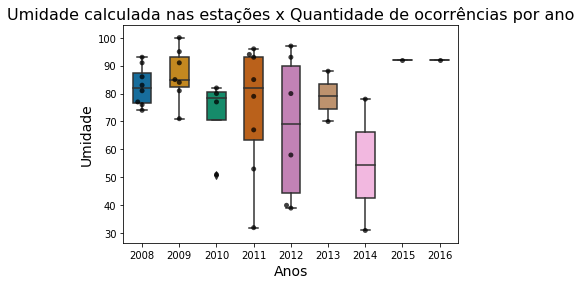

In [0]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='hmdy', x='yr', 
                 data=tabelao_40, 
                 width=0.5,
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='hmdy', x='yr',
              data=tabelao_40, 
              color='black',
              alpha=0.75)

bplot.axes.set_title("Umidade calculada nas estações x Quantidade de ocorrências por ano",
                    fontsize=16)
 
bplot.set_xlabel("Anos", 
                fontsize=14)
 
bplot.set_ylabel("Umidade",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

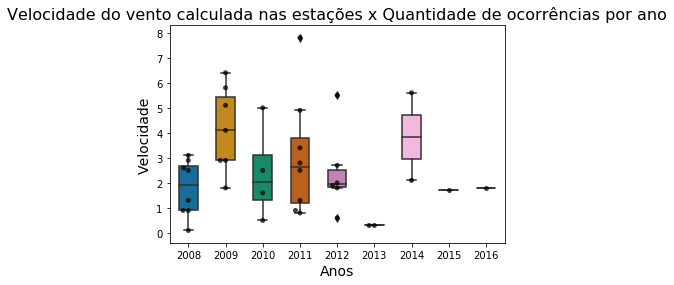

In [0]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='wdsp', x='yr', 
                 data=tabelao_40, 
                 width=0.5,
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='wdsp', x='yr',
              data=tabelao_40, 
              color='black',
              alpha=0.75)

bplot.axes.set_title("Velocidade do vento calculada nas estações x Quantidade de ocorrências por ano",
                    fontsize=16)
 
bplot.set_xlabel("Anos", 
                fontsize=14)
 
bplot.set_ylabel("Velocidade",
                fontsize=14)
 
bplot.tick_params(labelsize=10)


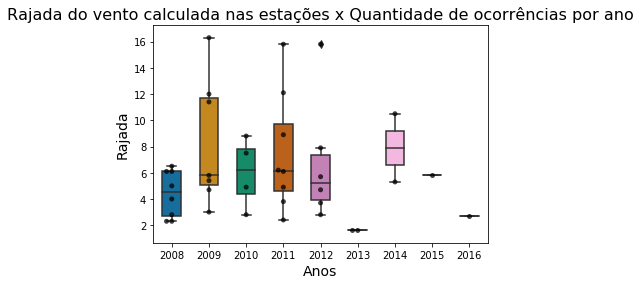

In [0]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='gust', x='yr', 
                 data=tabelao_40, 
                 width=0.5,
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='gust', x='yr',
              data=tabelao_40, 
              color='black',
              alpha=0.75)

bplot.axes.set_title("Rajada do vento calculada nas estações x Quantidade de ocorrências por ano",
                    fontsize=16)
 
bplot.set_xlabel("Anos", 
                fontsize=14)
 
bplot.set_ylabel("Rajada",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

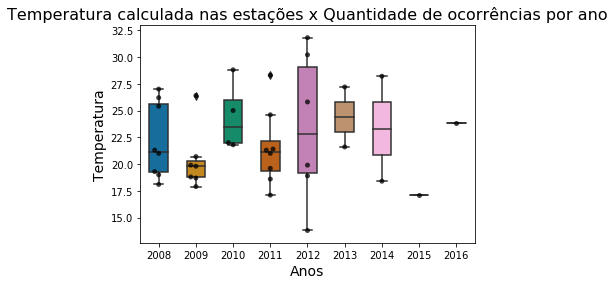

In [0]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='temp', x='yr', 
                 data=tabelao_40, 
                 width=0.5,
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='temp', x='yr',
              data=tabelao_40, 
              color='black',
              alpha=0.75)

bplot.axes.set_title("Temperatura calculada nas estações x Quantidade de ocorrências por ano",
                    fontsize=16)
 
bplot.set_xlabel("Anos", 
                fontsize=14)
 
bplot.set_ylabel("Temperatura",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

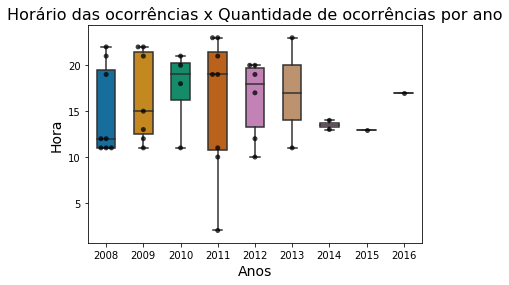

In [0]:
#tabelao_40.ocorrencia_horario_hr.astype('int64')

tabelao_40['ocorrencia_horario_hr']=tabelao_40['ocorrencia_horario_hr'].astype(np.float)

#print(tabelao_40.dtypes)

# plot boxplot with seaborn
bplot=sns.boxplot(y='ocorrencia_horario_hr', x='yr', 
                 data=tabelao_40, 
                 width=0.5,
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='ocorrencia_horario_hr', x='yr',
              data=tabelao_40, 
              color='black',
              alpha=0.75)

bplot.axes.set_title("Horário das ocorrências x Quantidade de ocorrências por ano",
                    fontsize=16)
 
bplot.set_xlabel("Anos", 
                fontsize=14)
 
bplot.set_ylabel("Hora",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

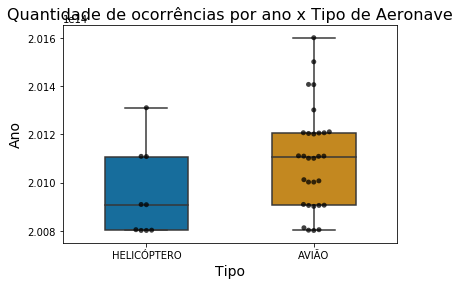

In [0]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='codigo_ocorrencia', x='aeronave_tipo_veiculo', 
                 data=tabelao_40, 
                 width=0.5,
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='codigo_ocorrencia', x='aeronave_tipo_veiculo',
              data=tabelao_40, 
              color='black',
              alpha=0.75)

bplot.axes.set_title("Quantidade de ocorrências por ano x Tipo de Aeronave",
                    fontsize=16)
 
bplot.set_xlabel("Tipo", 
                fontsize=14)
 
bplot.set_ylabel("Ano",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

In [0]:
df_fatores_contribuintes_completa = pd.read_csv('gdrive/My Drive/projetos/lp/ftc.csv', sep='~', header=0)

tabelao_40_fatores = pd.merge(tabelao_40, df_fatores_contribuintes_completa, on=['codigo_ocorrencia'])

print(tabelao_40_fatores.head(5))

tabelao_40_fatores.to_csv ('gdrive/My Drive/projetos/lp/tabela_40_fatores.csv', index = None, header=True)

#tabelao_40_fatores.fator_condicionante.apply(str)

#tabelao_40_fatores['fator_condicionante']= tabelao_40_fatores['fator_condicionante'].astype('str')

#print(tabelao_40_fatores.dtypes)


sns.set(color_codes=True)

#sns.distplot(tabelao_40_fatores['fator_condicionante'].value_counts())

#plt.barh(tabelao_40_fatores['fator_condicionante'],)

#tabelao_40_fatores.fator_nome_y.value_counts().plot(kind='barh', figsize=(10,5), grid=False, rot=0, color='blue')

#print(tabelao_40_fatores['fator_condicionante'].value_counts())

#f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
#sns.despine(left=True)


#sns.distplot(tabelao_40_fatores.fator_condicionante, color="m", ax=axes[1, 1])


#plt.setp(axes, yticks=[])
#plt.tight_layout()


   codigo_ocorrencia  ... fator_dia_extracao
0    200801159627220  ...         2019-01-30
1    200801159627220  ...         2019-01-30
2    200801159627220  ...         2019-01-30
3    200801159627220  ...         2019-01-30
4    200801159627220  ...         2019-01-30

[5 rows x 46 columns]


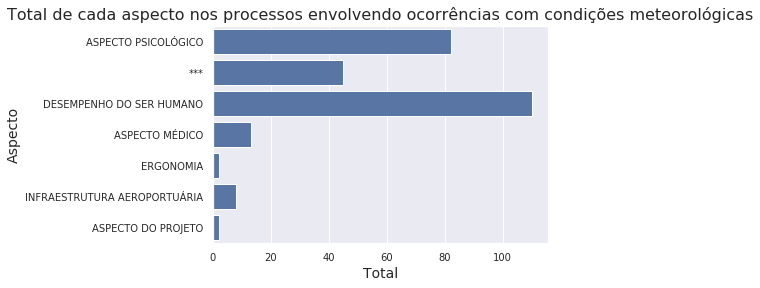

In [0]:
#sns.set(style="whitegrid")

bplot=sns.countplot(y="fator_aspecto", data=tabelao_40_fatores, color="b")

bplot.axes.set_title("Total de cada aspecto nos processos envolvendo ocorrências com condições meteorológicas",
                    fontsize=16)
 
bplot.set_xlabel("Total", 
                fontsize=14)
 
bplot.set_ylabel("Aspecto",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

#data_counts_1 = tabelao_40_fatores['fator_condicionante'].value_counts()

#print(data_counts_1)

#ax = sns.barplot(data=data_counts_1)

#tabelao_40_fatores.fator_aspecto.value_counts().plot(kind='barh', figsize=(10,5), grid=False, rot=0, color='blue')

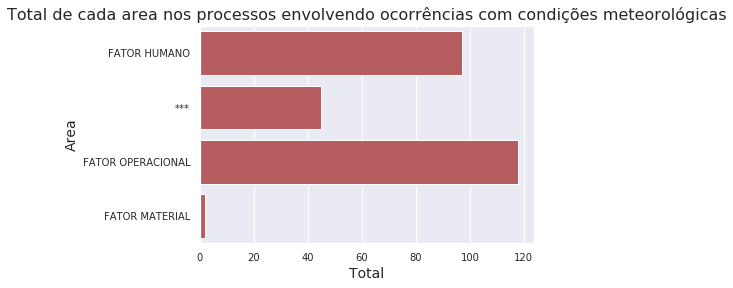

In [0]:
#sns.set(style="whitegrid")

bplot=sns.countplot(y="fator_area", data=tabelao_40_fatores, color="r")

bplot.axes.set_title("Total de cada area nos processos envolvendo ocorrências com condições meteorológicas",
                    fontsize=16)
 
bplot.set_xlabel("Total", 
                fontsize=14)
 
bplot.set_ylabel("Area",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

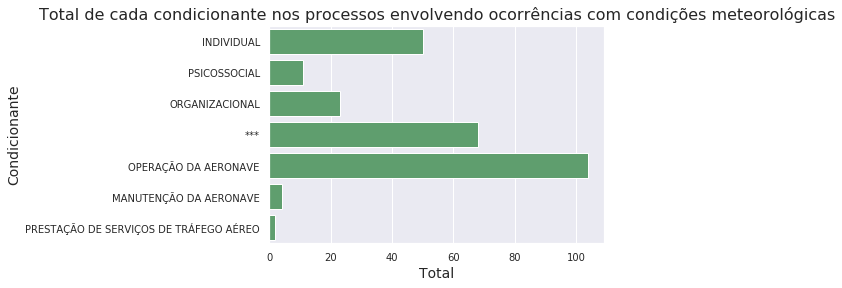

In [0]:
bplot=sns.countplot(y="fator_condicionante", data=tabelao_40_fatores, color="g")

bplot.axes.set_title("Total de cada condicionante nos processos envolvendo ocorrências com condições meteorológicas",
                    fontsize=16)
 
bplot.set_xlabel("Total", 
                fontsize=14)
 
bplot.set_ylabel("Condicionante",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

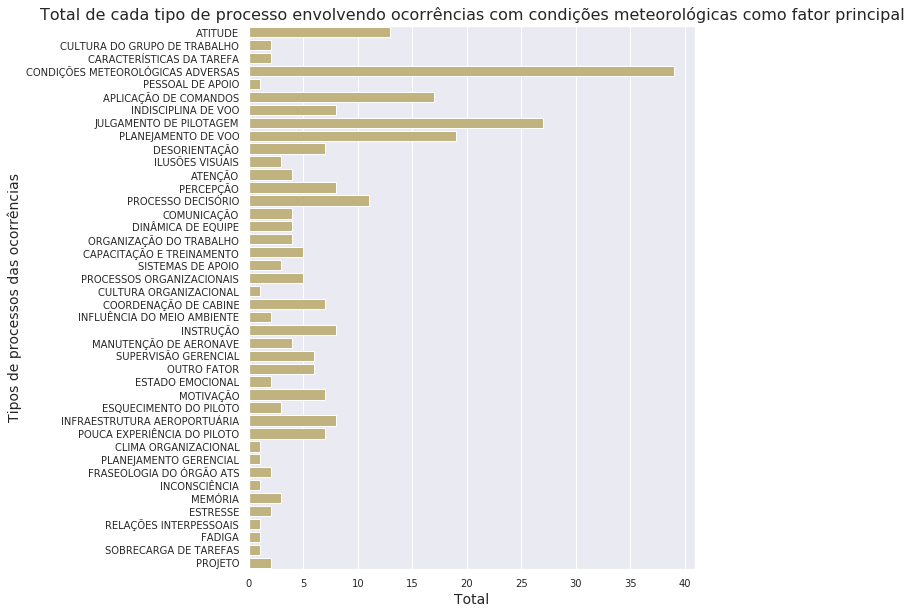

In [0]:
plt.figure(figsize=(8,10)) 

bplot=sns.countplot(y="fator_nome_y", data=tabelao_40_fatores, color="y")


bplot.axes.set_title("Total de cada tipo de processo envolvendo ocorrências com condições meteorológicas como fator principal",
                    fontsize=16)
 
bplot.set_xlabel("Total", 
                fontsize=14)
 
bplot.set_ylabel("Tipos de processos das ocorrências",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

plt.show()

In [0]:
from folium import plugins
coordenadas = []
lat = tabelao_40['ocorrencia_latitude'][:500].values
long = tabelao_40['ocorrencia_longitude'][:500].values

mapa = folium.Map(location=[-15.788497,-47.879873],tiles='Stamen Toner',zoom_start=4)

for la,lo in zip(lat,long):
    coordenadas.append([la,lo])

mapa.add_child(plugins.HeatMap(coordenadas))
mapa

In [0]:
l2 = df_met_sudeste.loc[:, ['wsid']]
print(l2)

new = l2.groupby('wsid')

print(new.head(5))
#print(new.shape)

         wsid
0         178
1         178
2         178
3         178
4         178
5         178
6         178
7         178
8         178
9         178
10        178
11        178
12        178
13        178
14        178
15        178
16        178
17        178
18        178
19        178
20        178
21        178
22        178
23        178
24        178
25        178
26        178
27        178
28        178
29        178
...       ...
9779138   423
9779139   423
9779140   423
9779141   423
9779142   423
9779143   423
9779144   423
9779145   423
9779146   423
9779147   423
9779148   423
9779149   423
9779150   423
9779151   423
9779152   423
9779153   423
9779154   423
9779155   423
9779156   423
9779157   423
9779158   423
9779159   423
9779160   423
9779161   423
9779162   423
9779163   423
9779164   423
9779165   423
9779166   423
9779167   423

[9779168 rows x 1 columns]
         wsid
0         178
1         178
2         178
3         178
4         178
78048     303
78049 

In [0]:
def haversine(rowlat1, rowlon1, rowlat2, rowlon2):
    # Raio da Terra em Km
    r = 6371
    # Converte coordenadas de graus para radianos

    lat1, lon1, lat2, lon2 = map(radians, [rowlat1, rowlon1,\
            rowlat1, rowlat2])

    # Formula de Haversine
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    hav = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    d = 2 * r * asin( sqrt(hav) )
    idwsid = None
    if (d <= 20):
    #idwsid = df['wsid']
        idwsid = True
    else:
        idwsid = False
    return idwsid

def encontrar_relacao(latitude, longitude, df):
    new1 = df.apply(haversine(latitude, longitude, df['lat'], df['lon'], axis=1)
         
new2 = df_ocorrencias_cond_met_aeronaves_sudeste.apply(encontrar_relacao(df_ocorrencias_cond_met_aeronaves_sudeste['ocorrencia_latitude'],df_ocorrencias_cond_met_aeronaves_sudeste['ocorrencia_longitude'], df_met_sudeste), axis=1)
new.head(5)

SyntaxError: ignored

In [0]:
#==============================================================================================

#===============================================================================================

def criar_dicionario_localizacao_ocorrencias(df1):
        df1_localizacao_geral = {}
        for index, rows in df1.iterrows():
                df1_localizacao = []
                codigo_ocorrencia = rows.codigo_ocorrencia
                latitude = rows.ocorrencia_latitude
                longitude = rows.ocorrencia_longitude
                hora = rows.ocorrencia_horario
                data = rows.ocorrencia_dia
                df1_localizacao.append(index)
                #df1_localizacao.append(codigo_ocorrencia)
                df1_localizacao.append(latitude)
                df1_localizacao.append(longitude)
                df1_localizacao.append(hora)
                df1_localizacao.append(data)
                df1_localizacao_geral[rows.codigo_ocorrencia] = df1_localizacao
                #print(df1_localizacao)

        #print(df1_localizacao_geral)

        return df1_localizacao_geral

#dic_ocorrencias = criar_dicionario_localizacao_ocorrencias(df_ocorrencias_cond_met_aeronaves_sudeste)

#print(dic_ocorrencias)

def criar_dicionario_localizacao_estacoes(df1):
        df1_localizacao_geral = {}
        for i in df1.iterrows():
                df1_localizacao = []
                latitude = i.lat
                longitude = i.lon
                data_hora = i.mdct
                df1_localizacao.append(latitude)
                df1_localizacao.append(longitude)
                df1_localizacao.append(data_hora)
                df1_localizacao_geral[i.wsid] = df1_localizacao
                #print(df1_localizacao)

        #print(df1_localizacao_geral)

        return df1_localizacao_geral

#dic_estacoes = criar_dicionario_localizacao_estacoes(df_met_sudeste)

#================================================================================================

# def extrair_lat_or_lon_2(rowlat2, rowlon2):

def cruzar_dados(serie1, serie2):
        lista = []
        lista.append(serie1)
        lista.append(serie2)
        return lista

def extrair_lat_or_lon(rowlat1, rowlon1):
        lista = []
        lista.append(rowlat1, rowlon1)
        #lista2 = []
        #lista2 = map(extrair_lat_or_lon_2,)
        return lista

# Formula de Haversine
def haversine(serie1, serie2):
        # print(x)
        # Raio da Terra em Km
        r = 6371
        # Converte coordenadas de graus para radianos
        #y = col1.tolist()
        #col1.map(extrair_lat_or_lon)
        
        #lista = col1.index.map(col2.index.map(df['lat'].index.map(df['lon'].index.map(extrair_lat_or_lon))))
        #print(lista)

        lista = map(cruzar_dados, (df_ocorrencias_cond_met_aeronaves_sudeste['ocorrencia_latitude'],\
                df_ocorrencias_cond_met_aeronaves_sudeste['ocorrencia_longitude']))
        
        #lista = map(extrair_lat_or_lon, rowlat1, rowlon1)

        print(lista)

        print(list(lista))

        # lat1, lon1, lat2, lon2 = map(radians, [rowlat1, rowlon1,\
        #          rowlat1, rowlat2])

        # Formula de Haversine
        # dlon = lon2 - lon1
        # dlat = lat2 - lat1
        # hav = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
        # d = 2 * r * asin( sqrt(hav) )
        # idwsid = 0
        # if (d <= 12):
        #         idwsid = df['wsid']
        # return idwsid

# def criar_lista_lat_lon(a):
#         # lista = []
#         # lista.append(a)
#         #lista.append(b)
#         return a

#print(df_ocorrencias_cond_met_aeronaves_sudeste.shape)
#print(df_met_sudeste.shape)

#df_met_sudeste.describe()

#l1 = df_ocorrencias_cond_met_aeronaves_sudeste.loc[:, ['ocorrencia_latitude','ocorrencia_longitude']]

#print(l1)

l2 = df_met_sudeste.loc[:, ['wsid','lat','lon']]
print(l2)
#a = 0
#while True:
#       
#        print( l2.loc[a,['wsid', 'lat']])
#        a += 1
#print(l2.loc[:'lat'])

def lat_lon

# df_ocorrencias_cond_met_aeronaves_sudeste['wsid'] = df_ocorrencias_cond_met_aeronaves_sudeste.apply\
#         (haversine(df_met_sudeste['lat'], df_met_sudeste['lon']), axis=1)

# df_ocorrencias_cond_met_aeronaves_sudeste['wsid'] = df_ocorrencias_cond_met_aeronaves_sudeste.apply\
#         (df_met_sudeste.apply(lambda row: haversine(row['lat'], row['lon'], row['ocorrencia_latitude'],\
#              row['ocorrencia_longitude']), axis=1))

 
#print(haversine(dic_ocorrencias, dic_estacoes))

#dic_haversine = haversine(dic_ocorrencias, dic_estacoes)

#print((haversine(dic_ocorrencias, dic_estacoes)).keys())

#print(len((haversine(dic_ocorrencias, dic_estacoes)).keys()))

#===============================================================================================

# def preencher_estacao(dic_haversine, df):
#         print(df.head(5))
#         idx = 0
#         for k,v in dic_haversine.items():
#                 if (df['codigo_ocorrencia'] == k).item():
#                         df.insert(idx,'estacao', v)
#                         idx += 1
#         return df

#df_ocorrencias_com_id_estacao = preencher_estacao(dic_haversine, df_ocorrencias_cond_met_aeronaves_sudeste)

#print(df_ocorrencias_com_id_estacao.head())

#================================================================================================

# def filtro_sudeste(df, dic):
#         for k,v in dic.items():
#                 df_filtrado = df.loc[df['wsid'].isin([v])]
#                 df_filtrado.to_csv ('/home/joao/Documentos/lp/'+str(v)+'.csv', index = None, header=True)

#filtro_sudeste(df_met_sudeste,dic_haversine)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt


df_ocorrencias = pd.read_csv('/home/joao/Documentos/lp/oco.csv', sep='~', header=0,\
         usecols=['codigo_ocorrencia','ocorrencia_classificacao', 'ocorrencia_tipo', 'ocorrencia_uf',\
                 'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_horario', 'ocorrencia_dia'])

#print(df_ocorrencias.head(5))
#print(df_ocorrencias.shape)

df_ocorrencias_sudeste = df_ocorrencias.loc[df_ocorrencias['ocorrencia_uf'].isin(['ES','MG','RJ','SP'])]

df_fatores_contribuintes = pd.read_csv('/home/joao/Documentos/lp/ftc.csv', sep='~', header=0,\
        usecols=['codigo_ocorrencia', 'fator_nome'])

#print(df_fatores_contribuintes.head(5))
#print(df_fatores_contribuintes.shape)

df_aeronaves_envolvidas = pd.read_csv('/home/joao/Documentos/lp/anv.csv', sep='~', header=0,\
        usecols=['codigo_ocorrencia', 'aeronave_tipo_veiculo', 'aeronave_fabricante',\
                'aeronave_modelo', 'aeronave_motor_tipo', 'aeronave_motor_quantidade',\
                        'aeronave_ano_fabricacao', 'aeronave_tipo_operacao', 'total_fatalidades'])

#print(df_aeronaves_envolvidas.head(5))
#print(df_aeronaves_envolvidas.shape)

df_ocorrencias_fatores_sudeste = pd.merge(df_ocorrencias_sudeste, df_fatores_contribuintes, on='codigo_ocorrencia', how='inner')

df_ocorrencias_cond_met_sudeste = df_ocorrencias_fatores_sudeste.loc[df_ocorrencias_fatores_sudeste['fator_nome'].isin(['CONDIÇÕES METEOROLÓGICAS ADVERSAS'])]

#print(df_ocorrencias_cond_met_sudeste.head(5))
#print(df_ocorrencias_fatores_sudeste.describe())
#print(df_ocorrencias_cond_met_sudeste.shape)

df_ocorrencias_cond_met_aeronaves_sudeste = pd.merge(df_ocorrencias_cond_met_sudeste, df_aeronaves_envolvidas, on='codigo_ocorrencia', how='inner')

#print(df_ocorrencias_cond_met_aeronaves_sudeste.head(5))
#print(df_ocorrencias_fatores_sudeste.describe())
#print(df_ocorrencias_cond_met_aeronaves_sudeste.shape)


df_ocorrencias_cond_met_aeronaves_sudeste.to_csv ('/home/joao/Documentos/lp/ocorrencias_cond_met_aeronaves_sudeste.csv', index = None, header=True)


#==============================================================================================

df_met_sudeste = pd.read_csv('/home/joao/Documentos/lp/sudeste.csv', sep=',', header=0,\
         usecols=['wsid','wsnm', 'elvt', 'lat', 'lon', 'city', 'prov', 'mdct', 'date',
         'yr', 'mo', 'da', 'hr', 'stp', 'gbrd', 'temp', 'hmdy', 'wdsp', 'wdct', 'gust'])

#print(df_met_sudeste.head(5))
#print(df_ocorrencias_fatores_sudeste.describe())
#print(df_met_sudeste.shape)

#===============================================================================================

def criar_dicionario_localizacao_ocorrencias(df1):
        df1_localizacao_geral = {}
        for index, rows in df1.iterrows():
                df1_localizacao = []
                codigo_ocorrencia = rows.codigo_ocorrencia
                latitude = rows.ocorrencia_latitude
                longitude = rows.ocorrencia_longitude
                hora = rows.ocorrencia_horario
                data = rows.ocorrencia_dia
                df1_localizacao.append(index)
                #df1_localizacao.append(codigo_ocorrencia)
                df1_localizacao.append(latitude)
                df1_localizacao.append(longitude)
                df1_localizacao.append(hora)
                df1_localizacao.append(data)
                df1_localizacao_geral[rows.codigo_ocorrencia] = df1_localizacao
                #print(df1_localizacao)

        #print(df1_localizacao_geral)

        return df1_localizacao_geral

#dic_ocorrencias = criar_dicionario_localizacao_ocorrencias(df_ocorrencias_cond_met_aeronaves_sudeste)


def criar_dicionario_localizacao_estacoes(df1):
        df1_localizacao_geral = {}
        for i in df1.iterrows():
                df1_localizacao = []
                latitude = i.lat
                longitude = i.lon
                data_hora = i.mdct
                df1_localizacao.append(latitude)
                df1_localizacao.append(longitude)
                df1_localizacao.append(data_hora)
                df1_localizacao_geral[i.wsid] = df1_localizacao
                #print(df1_localizacao)

        #print(df1_localizacao_geral)

        return df1_localizacao_geral

#dic_estacoes = criar_dicionario_localizacao_estacoes(df_met_sudeste)

#================================================================================================

def extrair_lat_or_lon(x):
        #print(x)
        return x

# Formula de Haversine
def haversine(df, col1, col2):
        # Raio da Terra em Km
        r = 6371
        # Converte coordenadas de graus para radianos
        #y = col1.tolist()
        #col1.map(extrair_lat_or_lon)
        
        lista = col1.index.map(col2.index.map(df['lat'].index.map(df['lon'].index.map(extrair_lat_or_lon))))
        print(lista)
        #lat1, lon1, lat2, lon2 = map(radians, [col1.index.map(extrair_lat_or_lon), col2.index.map(extrair_lat_or_lon),\
        #         df['lat'].index.map(extrair_lat_or_lon), df['lon'].index.map(extrair_lat_or_lon)])

        # Formula de Haversine
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        hav = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
        d = 2 * r * asin( sqrt(hav) )
        idwsid = 0
        if (d <= 12):
                idwsid = df['wsid']
        return idwsid


df_ocorrencias_cond_met_aeronaves_sudeste['wsid'] = df_ocorrencias_cond_met_aeronaves_sudeste.apply\
        (haversine(df_met_sudeste, df_ocorrencias_cond_met_aeronaves_sudeste['ocorrencia_latitude'], df_ocorrencias_cond_met_aeronaves_sudeste['ocorrencia_longitude']), axis=1)


#print(haversine(dic_ocorrencias, dic_estacoes))

#dic_haversine = haversine(dic_ocorrencias, dic_estacoes)

#print((haversine(dic_ocorrencias, dic_estacoes)).keys())

#print(len((haversine(dic_ocorrencias, dic_estacoes)).keys()))

#===============================================================================================

# def preencher_estacao(dic_haversine, df):
#         print(df.head(5))
#         idx = 0
#         for k,v in dic_haversine.items():
#                 if (df['codigo_ocorrencia'] == k).item():
#                         df.insert(idx,'estacao', v)
#                         idx += 1
#         return df

#df_ocorrencias_com_id_estacao = preencher_estacao(dic_haversine, df_ocorrencias_cond_met_aeronaves_sudeste)

#print(df_ocorrencias_com_id_estacao.head())

#================================================================================================

# def filtro_sudeste(df, dic):
#         for k,v in dic.items():
#                 df_filtrado = df.loc[df['wsid'].isin([v])]
#                 df_filtrado.to_csv ('/home/joao/Documentos/lp/'+str(v)+'.csv', index = None, header=True)

#filtro_sudeste(df_met_sudeste,dic_haversine)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt


# df_sudeste = pd.read_csv('/home/joao/Documentos/lp/sudeste.csv', sep=',', header=0, usecols=["elvt"])
# print(df_sudeste.head(5))

# def test_intertuples(df):
#     for i in df.itertuples():
#         elevation = i.elvt
#         print(elevation)

# test_intertuples(df_sudeste)

df_ocorrencias = pd.read_csv('/home/joao/Documentos/lp/oco.csv', sep='~', header=0,\
         usecols=['codigo_ocorrencia','ocorrencia_classificacao', 'ocorrencia_tipo', 'ocorrencia_uf',\
                 'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_horario', 'ocorrencia_dia'])

#print(df_ocorrencias.head(5))
#print(df_ocorrencias.shape)

df_ocorrencias_sudeste = df_ocorrencias.loc[df_ocorrencias['ocorrencia_uf'].isin(['ES','MG','RJ','SP'])]

df_fatores_contribuintes = pd.read_csv('/home/joao/Documentos/lp/ftc.csv', sep='~', header=0,\
        usecols=['codigo_ocorrencia', 'fator_nome'])

#print(df_fatores_contribuintes.head(5))
#print(df_fatores_contribuintes.shape)

df_aeronaves_envolvidas = pd.read_csv('/home/joao/Documentos/lp/anv.csv', sep='~', header=0,\
        usecols=['codigo_ocorrencia', 'aeronave_tipo_veiculo', 'aeronave_fabricante',\
                'aeronave_modelo', 'aeronave_motor_tipo', 'aeronave_motor_quantidade',\
                        'aeronave_ano_fabricacao', 'aeronave_tipo_operacao', 'total_fatalidades'])

#print(df_aeronaves_envolvidas.head(5))
#print(df_aeronaves_envolvidas.shape)

df_ocorrencias_fatores_sudeste = pd.merge(df_ocorrencias_sudeste, df_fatores_contribuintes, on='codigo_ocorrencia', how='inner')

df_ocorrencias_cond_met_sudeste = df_ocorrencias_fatores_sudeste.loc[df_ocorrencias_fatores_sudeste['fator_nome'].isin(['CONDIÇÕES METEOROLÓGICAS ADVERSAS'])]

#print(df_ocorrencias_cond_met_sudeste.head(5))
#print(df_ocorrencias_fatores_sudeste.describe())
#print(df_ocorrencias_cond_met_sudeste.shape)

df_ocorrencias_cond_met_aeronaves_sudeste = pd.merge(df_ocorrencias_cond_met_sudeste, df_aeronaves_envolvidas, on='codigo_ocorrencia', how='inner')

#print(df_ocorrencias_cond_met_aeronaves_sudeste.head(5))
#print(df_ocorrencias_fatores_sudeste.describe())
#print(df_ocorrencias_cond_met_aeronaves_sudeste.shape)

#df_ocorrencias_cond_met_aeronaves_sudeste['estacao'] = None

df_ocorrencias_cond_met_aeronaves_sudeste.to_csv ('/home/joao/Documentos/lp/ocorrencias_cond_met_aeronaves_sudeste.csv', index = None, header=True)


#==============================================================================================

df_met_sudeste = pd.read_csv('/home/joao/Documentos/lp/sudeste.csv', sep=',', header=0,\
         usecols=['wsid','wsnm', 'elvt', 'lat', 'lon', 'city', 'prov', 'mdct', 'date',
         'yr', 'mo', 'da', 'hr', 'stp', 'gbrd', 'temp', 'hmdy', 'wdsp', 'wdct', 'gust'])

#print(df_met_sudeste.head(5))
#print(df_ocorrencias_fatores_sudeste.describe())
#print(df_met_sudeste.shape)

#===============================================================================================

# def relacionar_localizacao(df1, df1_col1, df1_col2, df2, df2_col1, df2_col_2):
#     df1_localizacao = []
#     for i in df1.itertuples():
#         latitude = i.df1_col1
#         longitude = i.df1_col2
#         df1_localizacao[0] = latitude
#         df1_localizacao[1] = longitude
#         print(df1_localizacao)


def criar_dicionario_localizacao_ocorrencias(df1):
        df1_localizacao_geral = {}
        for index, rows in df1.iterrows():
                df1_localizacao = []
                codigo_ocorrencia = rows.codigo_ocorrencia
                latitude = rows.ocorrencia_latitude
                longitude = rows.ocorrencia_longitude
                hora = rows.ocorrencia_horario
                data = rows.ocorrencia_dia
                df1_localizacao.append(index)
                #df1_localizacao.append(codigo_ocorrencia)
                df1_localizacao.append(latitude)
                df1_localizacao.append(longitude)
                df1_localizacao.append(hora)
                df1_localizacao.append(data)
                df1_localizacao_geral[rows.codigo_ocorrencia] = df1_localizacao
                #print(df1_localizacao)

        #print(df1_localizacao_geral)

        return df1_localizacao_geral

dic_ocorrencias = criar_dicionario_localizacao_ocorrencias(df_ocorrencias_cond_met_aeronaves_sudeste)


def criar_dicionario_localizacao_estacoes(df1):
        df1_localizacao_geral = {}
        for i in df1.iterrows():
                df1_localizacao = []
                latitude = i.lat
                longitude = i.lon
                data_hora = i.mdct
                df1_localizacao.append(latitude)
                df1_localizacao.append(longitude)
                df1_localizacao.append(data_hora)
                df1_localizacao_geral[i.wsid] = df1_localizacao
                #print(df1_localizacao)

        print(df1_localizacao_geral)

        return df1_localizacao_geral

dic_estacoes = criar_dicionario_localizacao_estacoes(df_met_sudeste)

#================================================================================================

# Formula de Haversine
def haversine( a, b ):
        # Raio da Terra em Km
        r = 6371
        relacao_ocorrencia_estacao_12km = {}
        for k1, v1 in a.items():
                for k2, v2 in b.items():        
                        # Converte coordenadas de graus para radianos
                        lat1, lon1, lat2, lon2 = map(radians, [ v1[0], v2[1], v2[0], v2[1] ] )

                        # Formula de Haversine
                        dlon = lon2 - lon1
                        dlat = lat2 - lat1
                        hav = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
                        d = 2 * r * asin( sqrt(hav) )
                        #print(d)
                        v2_data = v2[2].split(" ")
                        v3_data = v1[3]
                        if (d <= 20 and v2_data == v3_data):
                                relacao_ocorrencia_estacao_12km[k1] = k2


        return relacao_ocorrencia_estacao_12km

print(haversine(dic_ocorrencias, dic_estacoes))

#dic_haversine = haversine(dic_ocorrencias, dic_estacoes)

#print((haversine(dic_ocorrencias, dic_estacoes)).keys())

print(len((haversine(dic_ocorrencias, dic_estacoes)).keys()))

#===============================================================================================

def preencher_estacao(dic_haversine, df):
        print(df.head(5))
        idx = 0
        for k,v in dic_haversine.items():
                if (df['codigo_ocorrencia'] == k).item():
                        df.insert(idx,'estacao', v)
                        idx += 1
        return df

#df_ocorrencias_com_id_estacao = preencher_estacao(dic_haversine, df_ocorrencias_cond_met_aeronaves_sudeste)

#print(df_ocorrencias_com_id_estacao.head())

#================================================================================================

def filtro_sudeste(df, dic):
        for k,v in dic.items():
                df_filtrado = df.loc[df['wsid'].isin([v])]
                df_filtrado.to_csv ('/home/joao/Documentos/lp/'+str(v)+'.csv', index = None, header=True)

#filtro_sudeste(df_met_sudeste,dic_haversine)

# Análise dos fatores condicionantes das ocorrências nas regiões Norte, Nordeste, Centro-Oeste, Sudeste e Sul do Brasil

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from math import radians, cos, sin, asin, sqrt

%matplotlib inline

sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(15,10)})

In [0]:
df_ocorrencias = pd.read_csv('gdrive/My Drive/projetos/lp/oco.csv', sep='~', header=0,\
         usecols=['codigo_ocorrencia','ocorrencia_classificacao', 'ocorrencia_tipo', 'ocorrencia_uf',\
                 'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_horario', 'ocorrencia_dia'])

print(df_ocorrencias.shape)
print(df_ocorrencias.head(5))


(5733, 8)
   codigo_ocorrencia ocorrencia_classificacao  ... ocorrencia_dia  ocorrencia_horario
0    201305055424986                 ACIDENTE  ...     2013-05-05            11:00:00
1    201805021421302                INCIDENTE  ...     2018-03-09            22:40:00
2    201605160250139          INCIDENTE GRAVE  ...     2016-05-13            19:19:00
3    201311259977425          INCIDENTE GRAVE  ...     2013-11-25            12:32:00
4    200808073991179                 ACIDENTE  ...     2008-08-07            15:10:00

[5 rows x 8 columns]


###Ocorrências por Regiões e Brasil.




In [0]:
df_ocorrencias_brasil = df_ocorrencias

print(df_ocorrencias_brasil.head(5))
print(df_ocorrencias_brasil.shape)

   codigo_ocorrencia ocorrencia_classificacao  ... ocorrencia_dia  ocorrencia_horario
0    201305055424986                 ACIDENTE  ...     2013-05-05            11:00:00
1    201805021421302                INCIDENTE  ...     2018-03-09            22:40:00
2    201605160250139          INCIDENTE GRAVE  ...     2016-05-13            19:19:00
3    201311259977425          INCIDENTE GRAVE  ...     2013-11-25            12:32:00
4    200808073991179                 ACIDENTE  ...     2008-08-07            15:10:00

[5 rows x 8 columns]
(5733, 8)


In [0]:
df_ocorrencias_sudeste = df_ocorrencias.loc[df_ocorrencias['ocorrencia_uf'].isin(['ES','MG','RJ','SP'])]

print(df_ocorrencias_sudeste.head(5))
print(df_ocorrencias_sudeste.shape)

In [0]:
df_ocorrencias_sul = df_ocorrencias.loc[df_ocorrencias['ocorrencia_uf'].isin(['RS','SC','PR'])]

print(df_ocorrencias_sul.head(5))
print(df_ocorrencias_sul.shape)

In [0]:
df_ocorrencias_nordeste = df_ocorrencias.loc[df_ocorrencias['ocorrencia_uf'].isin(['AL','BA','CE','MA','PB','PE','PI','RN','SE'])]

print(df_ocorrencias_nordeste.head(5))
print(df_ocorrencias_nordeste.shape)

In [0]:
df_ocorrencias_norte = df_ocorrencias.loc[df_ocorrencias['ocorrencia_uf'].isin(['AM','AC','AP','PA','RR','RO','TO'])]

print(df_ocorrencias_norte.head(5))
print(df_ocorrencias_norte.shape)

In [0]:
df_ocorrencias_centro = df_ocorrencias.loc[df_ocorrencias['ocorrencia_uf'].isin(['DF','GO','MT','MS'])]

print(df_ocorrencias_centro.head(5))
print(df_ocorrencias_centro.shape)

###Leitura Fatores Contribuintes

In [0]:
df_fatores_contribuintes = pd.read_csv('gdrive/My Drive/projetos/lp/ftc.csv', sep='~', header=0,\
        usecols=['codigo_ocorrencia', 'fator_nome'])

print(df_fatores_contribuintes.head(5))
print(df_fatores_contribuintes.shape)

   codigo_ocorrencia               fator_nome
0    200801041545367      INDISCIPLINA DE VOO
1    200801041545367                INSTRUÇÃO
2    200801041545367   MANUTENÇÃO DE AERONAVE
3    200801041545367              OUTRO FATOR
4    200801058203864  JULGAMENTO DE PILOTAGEM
(4800, 2)


###Merge das tabelas ocorrencias_regiao com fatores_contribuintes.

In [0]:
df_ocorrencias_fatores_brasil = pd.merge(df_ocorrencias_brasil, df_fatores_contribuintes, on='codigo_ocorrencia')

print(df_ocorrencias_fatores_brasil.head(5))
print(df_ocorrencias_fatores_brasil.shape)

   codigo_ocorrencia  ...               fator_nome
0    201311259977425  ...    COORDENAÇÃO DE CABINE
1    201311259977425  ...   ESQUECIMENTO DO PILOTO
2    200808073991179  ...  JULGAMENTO DE PILOTAGEM
3    200808073991179  ...      INDISCIPLINA DE VOO
4    200808073991179  ...   MANUTENÇÃO DE AERONAVE

[5 rows x 9 columns]
(4799, 9)


In [0]:
df_ocorrencias_fatores_sudeste = pd.merge(df_ocorrencias_sudeste, df_fatores_contribuintes, on='codigo_ocorrencia')

print(df_ocorrencias_fatores_sudeste.head(5))
print(df_ocorrencias_fatores_sudeste.shape)

In [0]:
df_ocorrencias_fatores_sul = pd.merge(df_ocorrencias_sul, df_fatores_contribuintes, on='codigo_ocorrencia')

print(df_ocorrencias_fatores_sul.shape)
print(df_ocorrencias_fatores_sul.head(5))


In [0]:
df_ocorrencias_fatores_norte = pd.merge(df_ocorrencias_norte, df_fatores_contribuintes, on='codigo_ocorrencia')

print(df_ocorrencias_fatores_norte.shape)
print(df_ocorrencias_fatores_norte.head(5))


In [0]:
df_ocorrencias_fatores_nordeste = pd.merge(df_ocorrencias_nordeste, df_fatores_contribuintes, on='codigo_ocorrencia')

print(df_ocorrencias_fatores_nordeste.shape)
print(df_ocorrencias_fatores_nordeste.head(5))

In [0]:
df_ocorrencias_fatores_centro = pd.merge(df_ocorrencias_centro, df_fatores_contribuintes, on='codigo_ocorrencia')

print(df_ocorrencias_fatores_centro.shape)
print(df_ocorrencias_fatores_centro.head(5))

###Criação da coluna ano, extraida da coluna ocorrencia_dia.

In [0]:
df_ocorrencias_fatores_brasil.dtypes
df_ocorrencias_fatores_brasil['ocorrencia_dia'] = pd.to_datetime(df_ocorrencias_fatores_brasil.ocorrencia_dia)
df_ocorrencias_fatores_brasil['ano'] = df_ocorrencias_fatores_brasil['ocorrencia_dia'].dt.strftime('%Y')

# df_ocorrencias_fatores_sudeste.dtypes
# df_ocorrencias_fatores_sudeste['ocorrencia_dia'] = pd.to_datetime(df_ocorrencias_fatores_sudeste.ocorrencia_dia)
# df_ocorrencias_fatores_sudeste['ano'] = df_ocorrencias_fatores_sudeste['ocorrencia_dia'].dt.strftime('%Y')

# df_ocorrencias_fatores_sul.dtypes
# df_ocorrencias_fatores_sul['ocorrencia_dia'] = pd.to_datetime(df_ocorrencias_fatores_sudeste.ocorrencia_dia)
# df_ocorrencias_fatores_sul['ano'] = df_ocorrencias_fatores_sudeste['ocorrencia_dia'].dt.strftime('%Y')

# df_ocorrencias_fatores_norte.dtypes
# df_ocorrencias_fatores_norte['ocorrencia_dia'] = pd.to_datetime(df_ocorrencias_fatores_norte.ocorrencia_dia)
# df_ocorrencias_fatores_norte['ano'] = df_ocorrencias_fatores_norte['ocorrencia_dia'].dt.strftime('%Y')

# df_ocorrencias_fatores_nordeste.dtypes
# df_ocorrencias_fatores_nordeste['ocorrencia_dia'] = pd.to_datetime(df_ocorrencias_fatores_nordeste.ocorrencia_dia)
# df_ocorrencias_fatores_nordeste['ano'] = df_ocorrencias_fatores_nordeste['ocorrencia_dia'].dt.strftime('%Y')

# df_ocorrencias_fatores_centro.dtypes
# df_ocorrencias_fatores_centro['ocorrencia_dia'] = pd.to_datetime(df_ocorrencias_fatores_centro.ocorrencia_dia)
# df_ocorrencias_fatores_centro['ano'] = df_ocorrencias_fatores_centro['ocorrencia_dia'].dt.strftime('%Y')

###Distribuição dos fatores no Brasil usando a Regra Pareto.



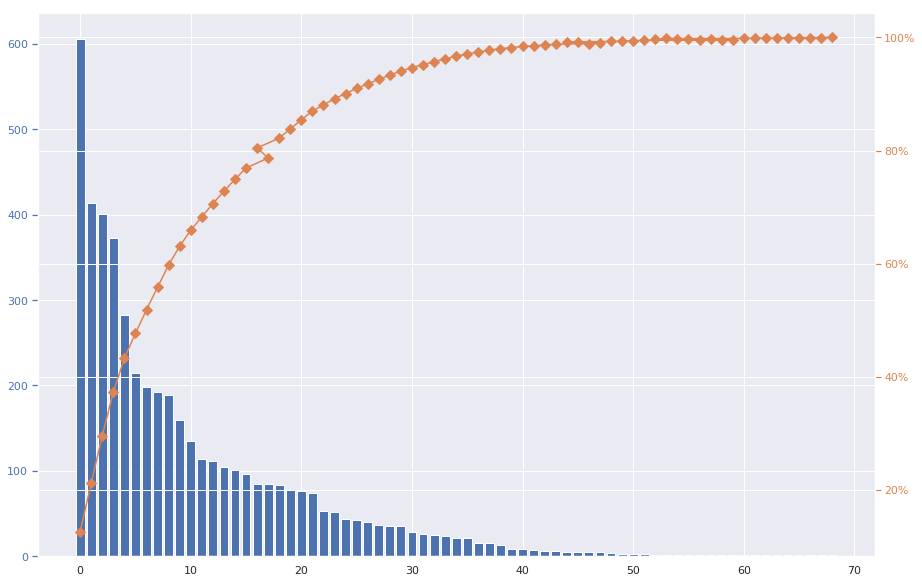

                                   fator_nome  total  cumpercentage
0                     JULGAMENTO DE PILOTAGEM    606      12.627631
1                        SUPERVISÃO GERENCIAL    413      21.233590
2                       APLICAÇÃO DE COMANDOS    401      29.589498
3                         PLANEJAMENTO DE VOO    372      37.341113
4                      MANUTENÇÃO DE AERONAVE    283      43.238175
5                          PROCESSO DECISÓRIO    215      47.718275
6                 POUCA EXPERIÊNCIA DO PILOTO    198      51.844134
7                                     ATITUDE    192      55.844968
8                         INDISCIPLINA DE VOO    189      59.783288
9                                   INSTRUÇÃO    159      63.096478
10          CONDIÇÕES METEOROLÓGICAS ADVERSAS    135      65.909564
11                                  PERCEPÇÃO    114      68.285059
12                      COORDENAÇÃO DE CABINE    112      70.618879
13                  PROCESSOS ORGANIZACIONAIS   

In [0]:
from matplotlib.ticker import PercentFormatter

df_ocorrencias_fatores_brasil_pareto = df_ocorrencias_fatores_brasil.fator_nome.value_counts()

df_ocorrencias_fatores_brasil_pareto = pd.DataFrame({'fator_nome':df_ocorrencias_fatores_brasil_pareto.index, 'total':df_ocorrencias_fatores_brasil_pareto.values})

df_ocorrencias_fatores_brasil_pareto = df_ocorrencias_fatores_brasil_pareto.sort_values(by='total',ascending=False)
df_ocorrencias_fatores_brasil_pareto["cumpercentage"] = df_ocorrencias_fatores_brasil_pareto["total"].cumsum()/df_ocorrencias_fatores_brasil_pareto["total"].sum()*100

fig, ax = plt.subplots()
ax.bar(df_ocorrencias_fatores_brasil_pareto.index, df_ocorrencias_fatores_brasil_pareto["total"], color="C0")
ax2 = ax.twinx()
ax2.plot(df_ocorrencias_fatores_brasil_pareto.index, df_ocorrencias_fatores_brasil_pareto["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

print(df_ocorrencias_fatores_brasil_pareto)

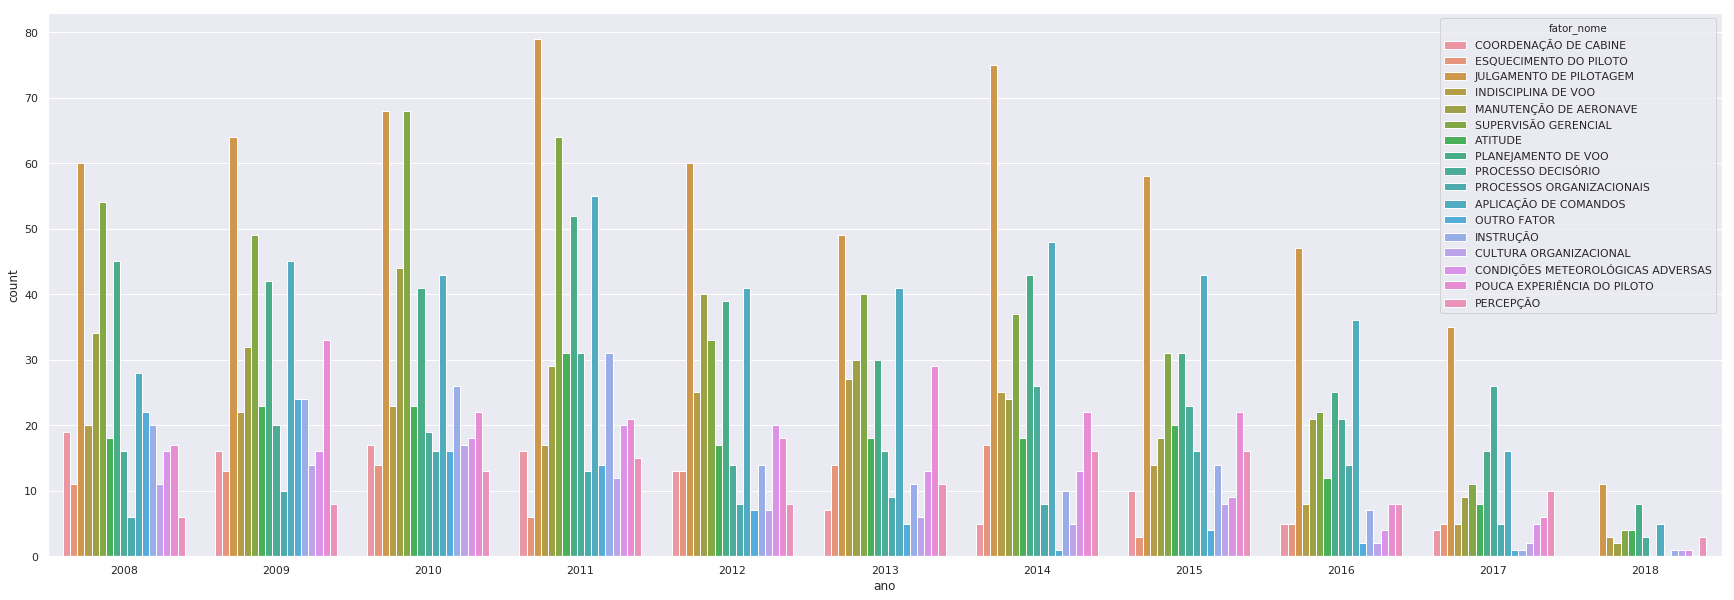

In [0]:
df_ocorrencias_fatores_brasil_top_pareto = df_ocorrencias_fatores_brasil.fator_nome.value_counts().head(17)

df_ocorrencias_fatores_brasil_top_pareto=pd.DataFrame({'fator_nome':df_ocorrencias_fatores_brasil_top_pareto.index, 'total':df_ocorrencias_fatores_brasil_top_pareto.values})

df_ocorrencias_fatores_brasil_filtro_pareto = pd.merge(df_ocorrencias_fatores_brasil, df_ocorrencias_fatores_brasil_top_pareto, on='fator_nome')

ax = sns.countplot(x="ano", hue="fator_nome", data=df_ocorrencias_fatores_brasil_filtro_pareto)

###Distribuição dos fatores no Sudeste usando a Regra Pareto.

In [0]:
from matplotlib.ticker import PercentFormatter

df_ocorrencias_fatores_sudeste_pareto = df_ocorrencias_fatores_sudeste.fator_nome.value_counts()

df_ocorrencias_fatores_sudeste_pareto = pd.DataFrame({'fator_nome':df_ocorrencias_fatores_sudeste_pareto.index, 'total':df_ocorrencias_fatores_sudeste_pareto.values})

df_ocorrencias_fatores_sudeste_pareto = df_ocorrencias_fatores_sudeste_pareto.sort_values(by='total',ascending=False)
df_ocorrencias_fatores_sudeste_pareto["cumpercentage"] = df_ocorrencias_fatores_sudeste_pareto["total"].cumsum()/df_ocorrencias_fatores_sudeste_pareto["total"].sum()*100

fig, ax = plt.subplots()
ax.bar(df_ocorrencias_fatores_sudeste_pareto.index, df_ocorrencias_fatores_sudeste_pareto["total"], color="C0")
ax2 = ax.twinx()
ax2.plot(df_ocorrencias_fatores_sudeste_pareto.index, df_ocorrencias_fatores_sudeste_pareto["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

print(df_ocorrencias_fatores_sudeste_pareto)

In [0]:
df_ocorrencias_fatores_sudeste_top_pareto = df_ocorrencias_fatores_sudeste.fator_nome.value_counts().head(18)

df_ocorrencias_fatores_sudeste_top_pareto=pd.DataFrame({'fator_nome':df_ocorrencias_fatores_sudeste_top_pareto.index, 'total':df_ocorrencias_fatores_sudeste_top_pareto.values})

df_ocorrencias_fatores_sudeste_filtro_pareto = pd.merge(df_ocorrencias_fatores_sudeste, df_ocorrencias_fatores_sudeste_top_pareto, on='fator_nome')

ax = sns.countplot(x="ano", hue="fator_nome", data=df_ocorrencias_fatores_sudeste_filtro_pareto)

###Distribuição dos fatores no Sul usando a Regra Pareto.

In [0]:
from matplotlib.ticker import PercentFormatter

df_ocorrencias_fatores_sul_pareto = df_ocorrencias_fatores_sul.fator_nome.value_counts()

df_ocorrencias_fatores_sul_pareto = pd.DataFrame({'fator_nome':df_ocorrencias_fatores_sul_pareto.index, 'total':df_ocorrencias_fatores_sul_pareto.values})

df_ocorrencias_fatores_sul_pareto = df_ocorrencias_fatores_sul_pareto.sort_values(by='total',ascending=False)
df_ocorrencias_fatores_sul_pareto["cumpercentage"] = df_ocorrencias_fatores_sul_pareto["total"].cumsum()/df_ocorrencias_fatores_sul_pareto["total"].sum()*100


fig, ax = plt.subplots()
ax.bar(df_ocorrencias_fatores_sul_pareto.index, df_ocorrencias_fatores_sul_pareto["total"], color="C0")
ax2 = ax.twinx()
ax2.plot(df_ocorrencias_fatores_sul_pareto.index, df_ocorrencias_fatores_sul_pareto["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

print(df_ocorrencias_fatores_sul_pareto)

In [0]:
df_ocorrencias_fatores_sul_top_pareto = df_ocorrencias_fatores_sul.fator_nome.value_counts().head(17)

df_ocorrencias_fatores_sul_top_pareto = pd.DataFrame({'fator_nome':df_ocorrencias_fatores_sul_top_pareto.index, 'total':df_ocorrencias_fatores_sul_top_pareto.values})

df_ocorrencias_fatores_sul_filtro_pareto = pd.merge(df_ocorrencias_fatores_sul, df_ocorrencias_fatores_sul_top_pareto, on='fator_nome')

ax = sns.countplot(x="ano", hue="fator_nome", data=df_ocorrencias_fatores_sul_filtro_pareto)

###Distribuição dos fatores no Norte usando a Regra Pareto.

In [0]:
from matplotlib.ticker import PercentFormatter

df_ocorrencias_fatores_norte_pareto = df_ocorrencias_fatores_norte.fator_nome.value_counts()

df_ocorrencias_fatores_norte_pareto = pd.DataFrame({'fator_nome':df_ocorrencias_fatores_norte_pareto.index, 'total':df_ocorrencias_fatores_norte_pareto.values})

df_ocorrencias_fatores_norte_pareto = df_ocorrencias_fatores_norte_pareto.sort_values(by='total',ascending=False)
df_ocorrencias_fatores_norte_pareto["cumpercentage"] = df_ocorrencias_fatores_norte_pareto["total"].cumsum()/df_ocorrencias_fatores_norte_pareto["total"].sum()*100


fig, ax = plt.subplots()
ax.bar(df_ocorrencias_fatores_norte_pareto.index, df_ocorrencias_fatores_norte_pareto["total"], color="C0")
ax2 = ax.twinx()
ax2.plot(df_ocorrencias_fatores_norte_pareto.index, df_ocorrencias_fatores_norte_pareto["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

print(df_ocorrencias_fatores_norte_pareto)

In [0]:
df_ocorrencias_fatores_norte_top_pareto = df_ocorrencias_fatores_norte.fator_nome.value_counts().head(17)

df_ocorrencias_fatores_norte_top_pareto=pd.DataFrame({'fator_nome':df_ocorrencias_fatores_norte_top_pareto.index, 'total':df_ocorrencias_fatores_norte_top_pareto.values})

df_ocorrencias_fatores_norte_filtro_pareto = pd.merge(df_ocorrencias_fatores_norte, df_ocorrencias_fatores_norte_top_pareto, on='fator_nome')

ax = sns.countplot(x="ano", hue="fator_nome", data=df_ocorrencias_fatores_norte_filtro_pareto)

###Distribuição dos fatores no Nordeste usando a Regra Pareto.

In [0]:
from matplotlib.ticker import PercentFormatter

df_ocorrencias_fatores_nordeste_pareto = df_ocorrencias_fatores_nordeste.fator_nome.value_counts()

df_ocorrencias_fatores_nordeste_pareto = pd.DataFrame({'fator_nome':df_ocorrencias_fatores_nordeste_pareto.index, 'total':df_ocorrencias_fatores_nordeste_pareto.values})

df_ocorrencias_fatores_nordeste_pareto = df_ocorrencias_fatores_nordeste_pareto.sort_values(by='total',ascending=False)
df_ocorrencias_fatores_nordeste_pareto["cumpercentage"] = df_ocorrencias_fatores_nordeste_pareto["total"].cumsum()/df_ocorrencias_fatores_nordeste_pareto["total"].sum()*100


fig, ax = plt.subplots()
ax.bar(df_ocorrencias_fatores_nordeste_pareto.index, df_ocorrencias_fatores_nordeste_pareto["total"], color="C0")
ax2 = ax.twinx()
ax2.plot(df_ocorrencias_fatores_nordeste_pareto.index, df_ocorrencias_fatores_nordeste_pareto["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

print(df_ocorrencias_fatores_nordeste_pareto)

In [0]:
df_ocorrencias_fatores_nordeste_top_pareto = df_ocorrencias_fatores_nordeste.fator_nome.value_counts().head(18)

df_ocorrencias_fatores_nordeste_top_pareto=pd.DataFrame({'fator_nome':df_ocorrencias_fatores_nordeste_top_pareto.index, 'total':df_ocorrencias_fatores_nordeste_top_pareto.values})

df_ocorrencias_fatores_nordeste_filtro_pareto = pd.merge(df_ocorrencias_fatores_nordeste, df_ocorrencias_fatores_nordeste_top_pareto, on='fator_nome')

ax = sns.countplot(x="ano", hue="fator_nome", data=df_ocorrencias_fatores_nordeste_filtro_pareto)

###Distribuição dos fatores no Centro-Oeste usando a Regra Pareto.

In [0]:
from matplotlib.ticker import PercentFormatter

df_ocorrencias_fatores_centro_pareto = df_ocorrencias_fatores_centro.fator_nome.value_counts()

df_ocorrencias_fatores_centro_pareto = pd.DataFrame({'fator_nome':df_ocorrencias_fatores_centro_pareto.index, 'total':df_ocorrencias_fatores_centro_pareto.values})

df_ocorrencias_fatores_centro_pareto = df_ocorrencias_fatores_centro_pareto.sort_values(by='total',ascending=False)
df_ocorrencias_fatores_centro_pareto["cumpercentage"] = df_ocorrencias_fatores_centro_pareto["total"].cumsum()/df_ocorrencias_fatores_centro_pareto["total"].sum()*100


fig, ax = plt.subplots()
ax.bar(df_ocorrencias_fatores_centro_pareto.index, df_ocorrencias_fatores_centro_pareto["total"], color="C0")
ax2 = ax.twinx()
ax2.plot(df_ocorrencias_fatores_centro_pareto.index, df_ocorrencias_fatores_centro_pareto["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

print(df_ocorrencias_fatores_centro_pareto)

In [0]:
df_ocorrencias_fatores_centro_top_pareto = df_ocorrencias_fatores_centro.fator_nome.value_counts().head(13)

df_ocorrencias_fatores_centro_top_pareto=pd.DataFrame({'fator_nome':df_ocorrencias_fatores_centro_top_pareto.index, 'total':df_ocorrencias_fatores_centro_top_pareto.values})

df_ocorrencias_fatores_centro_filtro_pareto = pd.merge(df_ocorrencias_fatores_centro, df_ocorrencias_fatores_centro_top_pareto, on='fator_nome')

ax = sns.countplot(x="ano", hue="fator_nome", data=df_ocorrencias_fatores_centro_filtro_pareto)

###Teste de hipótese distribuições (Condições Metereológicas)

In [0]:
df_ocorrencias = pd.read_csv('gdrive/My Drive/projetos/lp/oco.csv', sep='~', header=0,\
         usecols=['codigo_ocorrencia','ocorrencia_dia'])

print(df_ocorrencias.head(5))
print(df_ocorrencias.shape)

   codigo_ocorrencia ocorrencia_dia
0    201305055424986     2013-05-05
1    201805021421302     2018-03-09
2    201605160250139     2016-05-13
3    201311259977425     2013-11-25
4    200808073991179     2008-08-07
(5733, 2)


In [0]:
df_fatores_contribuintes = pd.read_csv('gdrive/My Drive/projetos/lp/ftc.csv', sep='~', header=0,\
        usecols=['codigo_ocorrencia', 'fator_nome'])

print(df_fatores_contribuintes.head(5))
print(df_fatores_contribuintes.shape)

   codigo_ocorrencia               fator_nome
0    200801041545367      INDISCIPLINA DE VOO
1    200801041545367                INSTRUÇÃO
2    200801041545367   MANUTENÇÃO DE AERONAVE
3    200801041545367              OUTRO FATOR
4    200801058203864  JULGAMENTO DE PILOTAGEM
(4800, 2)


In [0]:
df_ocorrencias_fatores = pd.merge(df_ocorrencias, df_fatores_contribuintes, on='codigo_ocorrencia')

print(df_ocorrencias_fatores.shape)
df_ocorrencias_fatores.head()

(4799, 3)


,codigo_ocorrencia,ocorrencia_dia,fator_nome
0,201311259977425,2013-11-25,COORDENAÇÃO DE CABINE
1,201311259977425,2013-11-25,ESQUECIMENTO DO PILOTO
2,200808073991179,2008-08-07,JULGAMENTO DE PILOTAGEM
3,200808073991179,2008-08-07,INDISCIPLINA DE VOO
4,200808073991179,2008-08-07,MANUTENÇÃO DE AERONAVE


In [0]:
df_ocorrencias_fatores['ocorrencia_dia'] = pd.to_datetime(df_ocorrencias_fatores.ocorrencia_dia)
df_ocorrencias_fatores['mes'] = df_ocorrencias_fatores['ocorrencia_dia'].dt.strftime('%Y-%m')
df_ocorrencias_fatores.drop('ocorrencia_dia', axis=1, inplace=True)
df_ocorrencias_fatores.head()

,codigo_ocorrencia,fator_nome,mes
0,201311259977425,COORDENAÇÃO DE CABINE,2013-11
1,201311259977425,ESQUECIMENTO DO PILOTO,2013-11
2,200808073991179,JULGAMENTO DE PILOTAGEM,2008-08
3,200808073991179,INDISCIPLINA DE VOO,2008-08
4,200808073991179,MANUTENÇÃO DE AERONAVE,2008-08


####Lista total de eventos mensais (incluindo condições metereológicas)

124
[56, 50, 28, 55, 19, 13, 57, 21, 40, 33, 58, 82, 52, 45, 50, 47, 55, 14, 60, 19, 65, 54, 41, 69, 73, 48, 29, 64, 73, 35, 64, 38, 60, 38, 37, 65, 85, 42, 38, 39, 56, 52, 71, 77, 48, 79, 47, 39, 50, 80, 24, 51, 30, 27, 38, 61, 29, 12, 46, 40, 27, 39, 27, 35, 26, 39, 37, 37, 42, 75, 22, 55, 67, 44, 61, 60, 35, 46, 22, 50, 25, 27, 28, 37, 27, 44, 26, 27, 45, 42, 32, 26, 29, 21, 52, 39, 59, 23, 55, 42, 4, 8, 23, 6, 31, 17, 9, 31, 26, 26, 18, 19, 21, 9, 15, 14, 17, 15, 11, 8, 13, 11, 13, 14]


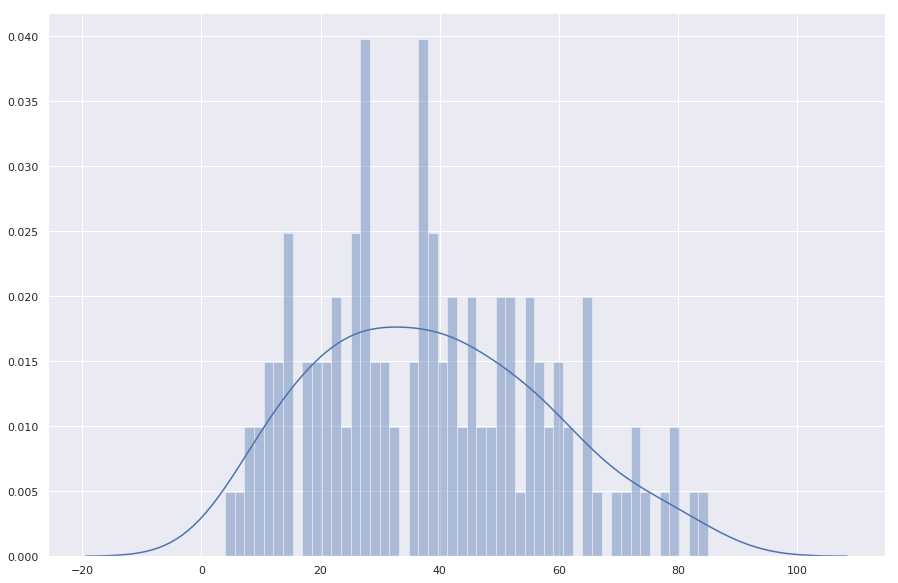

In [0]:
df_ocorrencias_fatores_total = df_ocorrencias_fatores.groupby('mes').size().reset_index(name='Quantidade_Eventos')

lista_eventos_totais = pd.Series(df_ocorrencias_fatores_total['Quantidade_Eventos']).tolist()

print(len(lista_eventos_totais))
print(lista_eventos_totais)

sns.distplot(lista_eventos_totais, bins=50, norm_hist=True)

####Lista eventos mensais por condições metereológicas

124
[3, 3, 1, 3, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 4, 1, 0, 1, 4, 1, 0, 2, 2, 4, 2, 1, 0, 1, 3, 1, 1, 0, 0, 3, 4, 0, 0, 1, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 3, 0, 2, 2, 0, 2, 1, 3, 1, 0, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1]


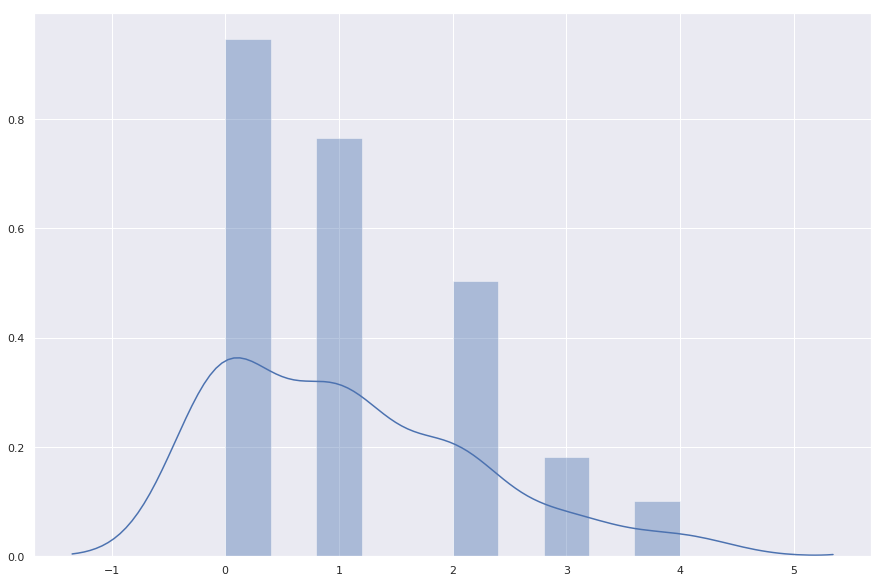

In [0]:
df_ocorrencias_fatores_eventos_totais = df_ocorrencias_fatores.groupby(['mes', 'fator_nome']).size().reset_index(name='Quantidade_Eventos')

#Tabelas apenas com meses
df_meses = pd.DataFrame(df_ocorrencias_fatores_eventos_totais['mes'].drop_duplicates())
df_meses.head()

#Tabela apenas com condições metereológicas
df_ocorrencias_fatores_eventos_apenas_cond_met = df_ocorrencias_fatores_eventos_totais.loc[df_ocorrencias_fatores_eventos_totais['fator_nome'] == 'CONDIÇÕES METEOROLÓGICAS ADVERSAS']

#Merge para adicionar zeros nos meses que não tiveram eventos
df_ocorrencias_fatores_eventos_cond_met = pd.merge(df_meses, df_ocorrencias_fatores_eventos_apenas_cond_met, on = 'mes', how = 'left')

df_ocorrencias_fatores_eventos_cond_met['Quantidade_Eventos'].fillna(0, inplace = True)

df_ocorrencias_fatores_eventos_cond_met = df_ocorrencias_fatores_eventos_cond_met.drop('fator_nome', axis=1)

lista_eventos_totais_cond_met = pd.Series(df_ocorrencias_fatores_eventos_cond_met['Quantidade_Eventos']).astype(int).tolist()

lista_eventos_totais_cond_met

print(len(lista_eventos_totais_cond_met))
print(lista_eventos_totais_cond_met)

sns.distplot(lista_eventos_totais_cond_met, bins=10, norm_hist=True)

####Subtraindo os valores de eventos por condições metereológicas na distribuição geral

In [0]:
df_ocorrencias_fatores_total_sem_cond_meter = df_ocorrencias_fatores[df_ocorrencias_fatores['fator_nome'].isin(['CONDIÇÕES METEOROLÓGICAS ADVERSAS']) == False]

print(df_ocorrencias_fatores_total_sem_cond_meter.shape)
df_ocorrencias_fatores_total_sem_cond_meter.head()

(4664, 3)


,codigo_ocorrencia,fator_nome,mes
0,201311259977425,COORDENAÇÃO DE CABINE,2013-11
1,201311259977425,ESQUECIMENTO DO PILOTO,2013-11
2,200808073991179,JULGAMENTO DE PILOTAGEM,2008-08
3,200808073991179,INDISCIPLINA DE VOO,2008-08
4,200808073991179,MANUTENÇÃO DE AERONAVE,2008-08


124
[53, 47, 27, 52, 18, 13, 57, 20, 40, 33, 56, 80, 51, 45, 48, 47, 51, 13, 60, 18, 61, 53, 41, 67, 71, 44, 27, 63, 73, 34, 61, 37, 59, 38, 37, 62, 81, 42, 38, 38, 54, 51, 69, 76, 46, 76, 45, 37, 48, 78, 22, 48, 30, 25, 36, 61, 27, 11, 43, 39, 27, 35, 27, 34, 25, 38, 36, 36, 41, 74, 21, 54, 64, 44, 60, 58, 34, 44, 20, 49, 25, 27, 27, 37, 27, 42, 25, 25, 43, 42, 32, 26, 29, 21, 52, 37, 58, 23, 54, 40, 4, 8, 23, 6, 31, 17, 9, 31, 25, 26, 18, 19, 20, 8, 15, 14, 16, 14, 11, 8, 13, 11, 13, 13]


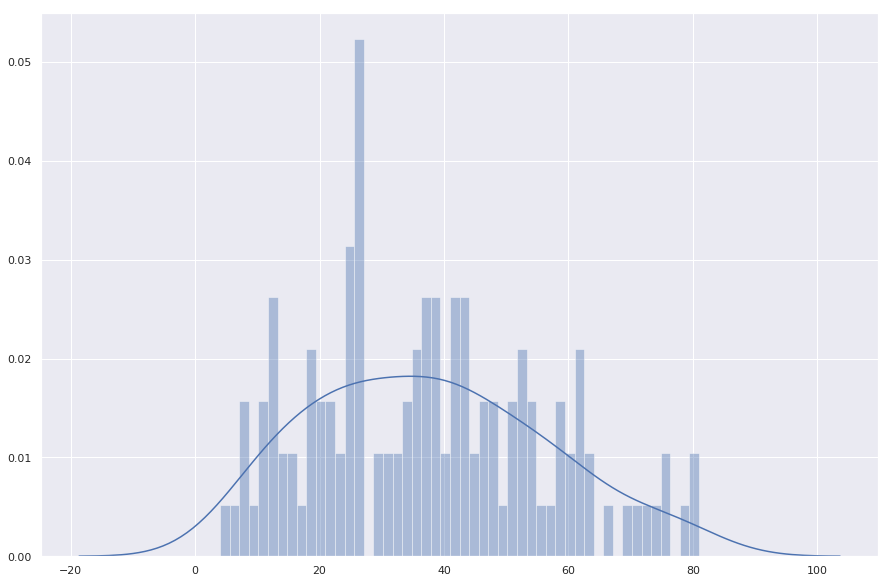

In [0]:
df_ocorrencias_fatores_total_sem_cond_meter_total = df_ocorrencias_fatores_total_sem_cond_meter.groupby('mes').size().reset_index(name='Quantidade_Eventos')

lista_eventos_sem_cond_meter_total = pd.Series(df_ocorrencias_fatores_total_sem_cond_meter_total['Quantidade_Eventos']).tolist()

print(len(lista_eventos_sem_cond_meter_total))
print(lista_eventos_sem_cond_meter_total)

sns.distplot(lista_eventos_sem_cond_meter_total, bins=50, norm_hist=True)

####Aplicando T-test (eventos totais sem condições metereológicas / eventos de condições metereológicas)

In [0]:
from scipy import stats

print(lista_eventos_sem_cond_meter_total)
print(lista_eventos_totais_cond_met)
stats.ttest_rel(lista_eventos_sem_cond_meter_total,lista_eventos_totais_cond_met)

[53, 47, 27, 52, 18, 13, 57, 20, 40, 33, 56, 80, 51, 45, 48, 47, 51, 13, 60, 18, 61, 53, 41, 67, 71, 44, 27, 63, 73, 34, 61, 37, 59, 38, 37, 62, 81, 42, 38, 38, 54, 51, 69, 76, 46, 76, 45, 37, 48, 78, 22, 48, 30, 25, 36, 61, 27, 11, 43, 39, 27, 35, 27, 34, 25, 38, 36, 36, 41, 74, 21, 54, 64, 44, 60, 58, 34, 44, 20, 49, 25, 27, 27, 37, 27, 42, 25, 25, 43, 42, 32, 26, 29, 21, 52, 37, 58, 23, 54, 40, 4, 8, 23, 6, 31, 17, 9, 31, 25, 26, 18, 19, 20, 8, 15, 14, 16, 14, 11, 8, 13, 11, 13, 13]
[3, 3, 1, 3, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 4, 1, 0, 1, 4, 1, 0, 2, 2, 4, 2, 1, 0, 1, 3, 1, 1, 0, 0, 3, 4, 0, 0, 1, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 3, 0, 2, 2, 0, 2, 1, 3, 1, 0, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1]


Ttest_relResult(statistic=22.323931717255988, pvalue=4.383213517537111e-45)

####Aplicando T-test (eventos totais com condições metereológicas / eventos de condições metereológicas)

In [0]:
from scipy import stats

print(lista_eventos_totais)
print(lista_eventos_totais_cond_met)
stats.ttest_rel(lista_eventos_totais,lista_eventos_totais_cond_met)

[56, 50, 28, 55, 19, 13, 57, 21, 40, 33, 58, 82, 52, 45, 50, 47, 55, 14, 60, 19, 65, 54, 41, 69, 73, 48, 29, 64, 73, 35, 64, 38, 60, 38, 37, 65, 85, 42, 38, 39, 56, 52, 71, 77, 48, 79, 47, 39, 50, 80, 24, 51, 30, 27, 38, 61, 29, 12, 46, 40, 27, 39, 27, 35, 26, 39, 37, 37, 42, 75, 22, 55, 67, 44, 61, 60, 35, 46, 22, 50, 25, 27, 28, 37, 27, 44, 26, 27, 45, 42, 32, 26, 29, 21, 52, 39, 59, 23, 55, 42, 4, 8, 23, 6, 31, 17, 9, 31, 26, 26, 18, 19, 21, 9, 15, 14, 17, 15, 11, 8, 13, 11, 13, 14]
[3, 3, 1, 3, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 4, 1, 0, 1, 4, 1, 0, 2, 2, 4, 2, 1, 0, 1, 3, 1, 1, 0, 0, 3, 4, 0, 0, 1, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 3, 0, 2, 2, 0, 2, 1, 3, 1, 0, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1]


Ttest_relResult(statistic=22.38754737006408, pvalue=3.3080174504908085e-45)

####Aplicando T-test (eventos totais com condições metereológicas / eventos totais sem condições metereológicas)

[56, 50, 28, 55, 19, 13, 57, 21, 40, 33, 58, 82, 52, 45, 50, 47, 55, 14, 60, 19, 65, 54, 41, 69, 73, 48, 29, 64, 73, 35, 64, 38, 60, 38, 37, 65, 85, 42, 38, 39, 56, 52, 71, 77, 48, 79, 47, 39, 50, 80, 24, 51, 30, 27, 38, 61, 29, 12, 46, 40, 27, 39, 27, 35, 26, 39, 37, 37, 42, 75, 22, 55, 67, 44, 61, 60, 35, 46, 22, 50, 25, 27, 28, 37, 27, 44, 26, 27, 45, 42, 32, 26, 29, 21, 52, 39, 59, 23, 55, 42, 4, 8, 23, 6, 31, 17, 9, 31, 26, 26, 18, 19, 21, 9, 15, 14, 17, 15, 11, 8, 13, 11, 13, 14]
[53, 47, 27, 52, 18, 13, 57, 20, 40, 33, 56, 80, 51, 45, 48, 47, 51, 13, 60, 18, 61, 53, 41, 67, 71, 44, 27, 63, 73, 34, 61, 37, 59, 38, 37, 62, 81, 42, 38, 38, 54, 51, 69, 76, 46, 76, 45, 37, 48, 78, 22, 48, 30, 25, 36, 61, 27, 11, 43, 39, 27, 35, 27, 34, 25, 38, 36, 36, 41, 74, 21, 54, 64, 44, 60, 58, 34, 44, 20, 49, 25, 27, 27, 37, 27, 42, 25, 25, 43, 42, 32, 26, 29, 21, 52, 37, 58, 23, 54, 40, 4, 8, 23, 6, 31, 17, 9, 31, 25, 26, 18, 19, 20, 8, 15, 14, 16, 14, 11, 8, 13, 11, 13, 13]
Ttest_indResult(st

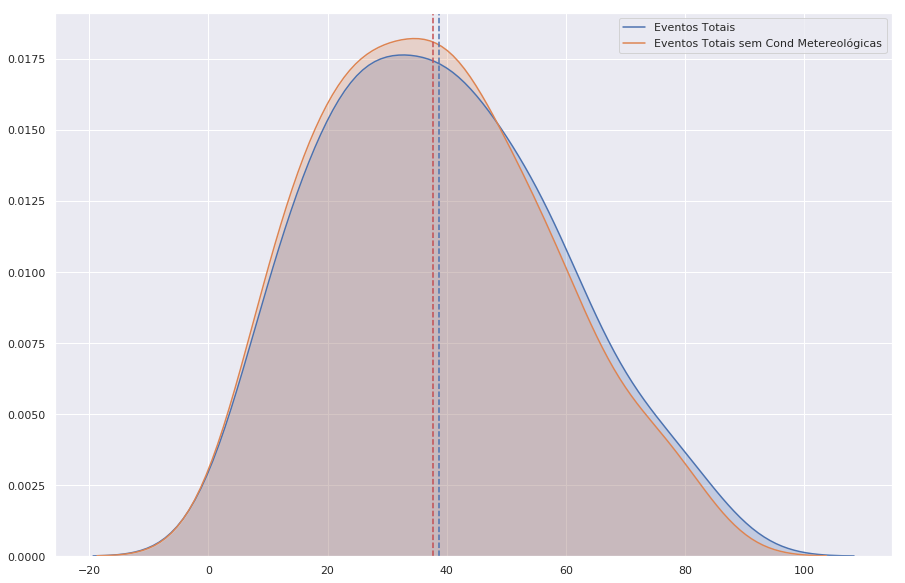

In [0]:
from scipy import stats
import numpy as np
import scipy

print(lista_eventos_totais)
print(lista_eventos_sem_cond_meter_total)
print(stats.mstats.ttest_ind(lista_eventos_totais,lista_eventos_sem_cond_meter_total))

sns.kdeplot(lista_eventos_totais, label='Eventos Totais', shade=True)
sns.kdeplot(lista_eventos_sem_cond_meter_total, label='Eventos Totais sem Cond Metereológicas', shade=True)

m = sum(lista_eventos_totais) / len(lista_eventos_totais)
plt.axvline(m, color="b", linestyle="--");

n = sum(lista_eventos_sem_cond_meter_total) / len(lista_eventos_sem_cond_meter_total)
plt.axvline(n, color="r", linestyle="--");

###Teste de hipótese distribuições (Desempenho do Ser Humano)

In [0]:
df_ocorrencias = pd.read_csv('gdrive/My Drive/projetos/lp/oco.csv', sep='~', header=0,\
         usecols=['codigo_ocorrencia','ocorrencia_dia'])

print(df_ocorrencias.head(5))
print(df_ocorrencias.shape)

   codigo_ocorrencia ocorrencia_dia
0    201305055424986     2013-05-05
1    201805021421302     2018-03-09
2    201605160250139     2016-05-13
3    201311259977425     2013-11-25
4    200808073991179     2008-08-07
(5733, 2)


In [0]:
df_fator_aspecto = pd.read_csv('gdrive/My Drive/projetos/lp/ftc.csv', sep='~', header=0,\
        usecols=['codigo_ocorrencia', 'fator_aspecto'])

print(df_fator_aspecto.head(5))
print(df_fator_aspecto.shape)

   codigo_ocorrencia             fator_aspecto
0    200801041545367  DESEMPENHO DO SER HUMANO
1    200801041545367  DESEMPENHO DO SER HUMANO
2    200801041545367  DESEMPENHO DO SER HUMANO
3    200801041545367                       ***
4    200801058203864  DESEMPENHO DO SER HUMANO
(4800, 2)


In [0]:
df_ocorrencias_fatores_aspecto = pd.merge(df_ocorrencias, df_fator_aspecto, on='codigo_ocorrencia')

print(df_ocorrencias_fatores_aspecto.shape)
df_ocorrencias_fatores_aspecto.head()

(4799, 3)


,codigo_ocorrencia,ocorrencia_dia,fator_aspecto
0,201311259977425,2013-11-25,DESEMPENHO DO SER HUMANO
1,201311259977425,2013-11-25,DESEMPENHO DO SER HUMANO
2,200808073991179,2008-08-07,DESEMPENHO DO SER HUMANO
3,200808073991179,2008-08-07,DESEMPENHO DO SER HUMANO
4,200808073991179,2008-08-07,DESEMPENHO DO SER HUMANO


In [0]:
df_ocorrencias_fatores_aspecto['ocorrencia_dia'] = pd.to_datetime(df_ocorrencias_fatores_aspecto.ocorrencia_dia)
df_ocorrencias_fatores_aspecto['mes'] = df_ocorrencias_fatores_aspecto['ocorrencia_dia'].dt.strftime('%Y-%m')
df_ocorrencias_fatores_aspecto.drop('ocorrencia_dia', axis=1, inplace=True)

print(df_ocorrencias_fatores_aspecto.shape)
df_ocorrencias_fatores_aspecto.head()

(4799, 3)


,codigo_ocorrencia,fator_aspecto,mes
0,201311259977425,DESEMPENHO DO SER HUMANO,2013-11
1,201311259977425,DESEMPENHO DO SER HUMANO,2013-11
2,200808073991179,DESEMPENHO DO SER HUMANO,2008-08
3,200808073991179,DESEMPENHO DO SER HUMANO,2008-08
4,200808073991179,DESEMPENHO DO SER HUMANO,2008-08


####Lista total de eventos mensais (incluindo desempenho humano)

124
[56, 50, 28, 55, 19, 13, 57, 21, 40, 33, 58, 82, 52, 45, 50, 47, 55, 14, 60, 19, 65, 54, 41, 69, 73, 48, 29, 64, 73, 35, 64, 38, 60, 38, 37, 65, 85, 42, 38, 39, 56, 52, 71, 77, 48, 79, 47, 39, 50, 80, 24, 51, 30, 27, 38, 61, 29, 12, 46, 40, 27, 39, 27, 35, 26, 39, 37, 37, 42, 75, 22, 55, 67, 44, 61, 60, 35, 46, 22, 50, 25, 27, 28, 37, 27, 44, 26, 27, 45, 42, 32, 26, 29, 21, 52, 39, 59, 23, 55, 42, 4, 8, 23, 6, 31, 17, 9, 31, 26, 26, 18, 19, 21, 9, 15, 14, 17, 15, 11, 8, 13, 11, 13, 14]


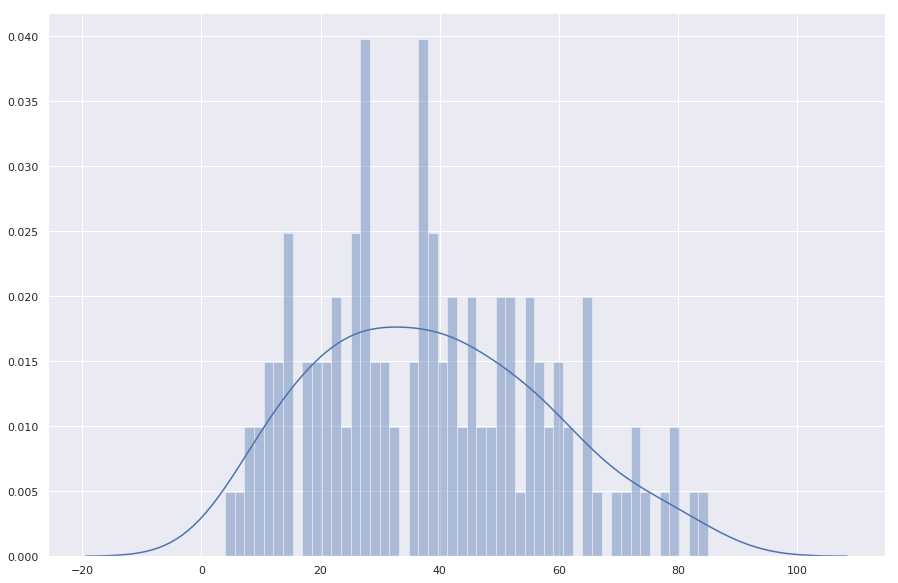

In [0]:
df_ocorrencias_fatores_aspecto_total = df_ocorrencias_fatores_aspecto.groupby('mes').size().reset_index(name='Quantidade_Eventos')

lista_eventos_totais = pd.Series(df_ocorrencias_fatores_aspecto_total['Quantidade_Eventos']).tolist()

print(len(lista_eventos_totais))
print(lista_eventos_totais)

sns.distplot(lista_eventos_totais, bins=50, norm_hist=True)

####Lista eventos mensais por desempenho ser humano

124
[36, 23, 14, 29, 11, 10, 44, 14, 26, 27, 38, 51, 38, 29, 36, 29, 30, 11, 29, 15, 36, 33, 30, 40, 42, 26, 26, 38, 35, 30, 42, 18, 40, 28, 25, 38, 42, 28, 29, 29, 26, 26, 35, 44, 31, 42, 31, 27, 29, 43, 17, 31, 23, 21, 24, 44, 22, 11, 22, 22, 16, 20, 15, 19, 21, 24, 29, 22, 27, 46, 16, 35, 44, 27, 42, 32, 21, 28, 18, 26, 17, 20, 16, 28, 18, 33, 17, 18, 29, 22, 23, 19, 13, 11, 27, 22, 36, 11, 31, 28, 2, 5, 14, 4, 21, 13, 6, 19, 11, 20, 13, 13, 9, 4, 7, 8, 11, 8, 3, 4, 9, 10, 8, 7]


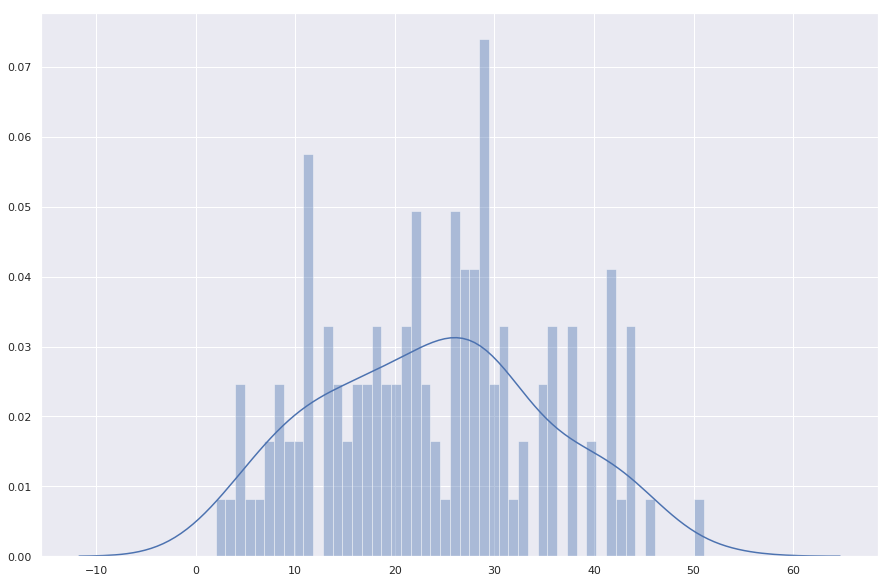

In [0]:
df_ocorrencias_fatores_aspecto
df_ocorrencias_fatores_aspecto_eventos_totais = df_ocorrencias_fatores_aspecto.groupby(['mes', 'fator_aspecto']).size().reset_index(name='Quantidade_Eventos')

df_ocorrencias_fatores_aspecto_eventos = df_ocorrencias_fatores_aspecto_eventos_totais.loc[df_ocorrencias_fatores_aspecto_eventos_totais['fator_aspecto'] == 'DESEMPENHO DO SER HUMANO']

df_ocorrencias_fatores_aspecto_eventos = df_ocorrencias_fatores_aspecto_eventos.drop('fator_aspecto', axis=1)

lista_eventos_totais_asp_humano = pd.Series(df_ocorrencias_fatores_aspecto_eventos['Quantidade_Eventos']).tolist()

print(len(lista_eventos_totais_asp_humano))
print(lista_eventos_totais_asp_humano)

sns.distplot(lista_eventos_totais_asp_humano, bins=50, norm_hist=True)

####Subtraindo os valores de eventos por desempenho humano na distribuição geral

In [0]:
df_ocorrencias_fatores_totais_sem_desemp_hum = df_ocorrencias_fatores_aspecto[df_ocorrencias_fatores_aspecto['fator_aspecto'].isin(['DESEMPENHO DO SER HUMANO']) == False]

print(df_ocorrencias_fatores_totais_sem_desemp_hum.shape)
df_ocorrencias_fatores_totais_sem_desemp_hum.head()

(1837, 3)


,codigo_ocorrencia,fator_aspecto,mes
6,201604062021424,ASPECTO PSICOLÓGICO,2016-04
10,201604062021424,ASPECTO PSICOLÓGICO,2016-04
11,201604062021424,ASPECTO PSICOLÓGICO,2016-04
12,201604062021424,ASPECTO PSICOLÓGICO,2016-04
17,201108118145873,***,2011-08


124
[20, 27, 14, 26, 8, 3, 13, 7, 14, 6, 20, 31, 14, 16, 14, 18, 25, 3, 31, 4, 29, 21, 11, 29, 31, 22, 3, 26, 38, 5, 22, 20, 20, 10, 12, 27, 43, 14, 9, 10, 30, 26, 36, 33, 17, 37, 16, 12, 21, 37, 7, 20, 7, 6, 14, 17, 7, 1, 24, 18, 11, 19, 12, 16, 5, 15, 8, 15, 15, 29, 6, 20, 23, 17, 19, 28, 14, 18, 4, 24, 8, 7, 12, 9, 9, 11, 9, 9, 16, 20, 9, 7, 16, 10, 25, 17, 23, 12, 24, 14, 2, 3, 9, 2, 10, 4, 3, 12, 15, 6, 5, 6, 12, 5, 8, 6, 6, 7, 8, 4, 4, 1, 5, 7]


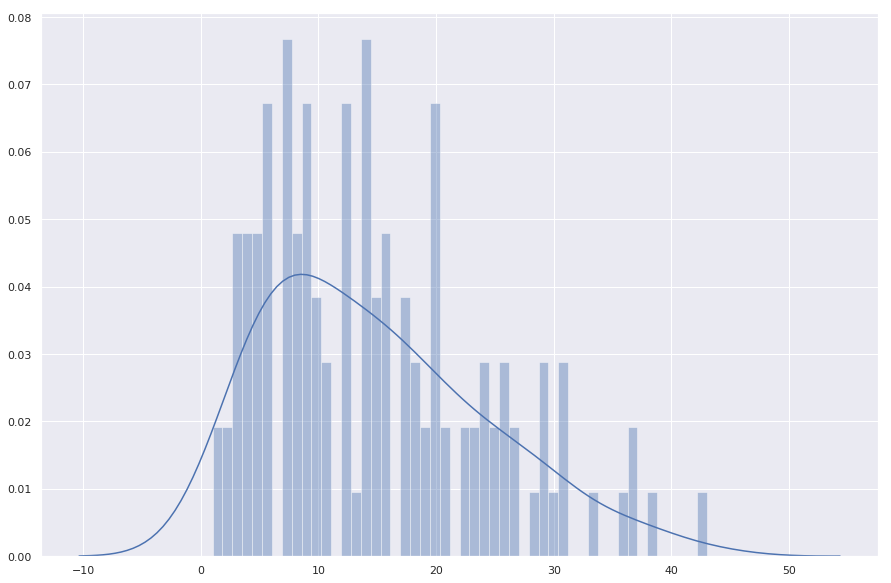

In [0]:
df_ocorrencias_fatores_totais_sem_desemp_hum_total = df_ocorrencias_fatores_totais_sem_desemp_hum.groupby('mes').size().reset_index(name='Quantidade_Eventos')

lista_eventos_sem_desemp_hum_total = pd.Series(df_ocorrencias_fatores_totais_sem_desemp_hum_total['Quantidade_Eventos']).tolist()

print(len(lista_eventos_sem_desemp_hum_total))
print(lista_eventos_sem_desemp_hum_total)

sns.distplot(lista_eventos_sem_desemp_hum_total, bins=50, norm_hist=True)

####Aplicando T-test (eventos totais sem desempenho / eventos de desempenho)

In [0]:
from scipy import stats

print(lista_eventos_sem_desemp_hum_total)
print(lista_eventos_totais_asp_humano)
stats.ttest_rel(lista_eventos_sem_desemp_hum_total,lista_eventos_totais_asp_humano)
# sns.distplot(lista_eventos_sem_desemp_hum_brasil_total_mes, bins=50, norm_hist=True)

[20, 27, 14, 26, 8, 3, 13, 7, 14, 6, 20, 31, 14, 16, 14, 18, 25, 3, 31, 4, 29, 21, 11, 29, 31, 22, 3, 26, 38, 5, 22, 20, 20, 10, 12, 27, 43, 14, 9, 10, 30, 26, 36, 33, 17, 37, 16, 12, 21, 37, 7, 20, 7, 6, 14, 17, 7, 1, 24, 18, 11, 19, 12, 16, 5, 15, 8, 15, 15, 29, 6, 20, 23, 17, 19, 28, 14, 18, 4, 24, 8, 7, 12, 9, 9, 11, 9, 9, 16, 20, 9, 7, 16, 10, 25, 17, 23, 12, 24, 14, 2, 3, 9, 2, 10, 4, 3, 12, 15, 6, 5, 6, 12, 5, 8, 6, 6, 7, 8, 4, 4, 1, 5, 7]
[36, 23, 14, 29, 11, 10, 44, 14, 26, 27, 38, 51, 38, 29, 36, 29, 30, 11, 29, 15, 36, 33, 30, 40, 42, 26, 26, 38, 35, 30, 42, 18, 40, 28, 25, 38, 42, 28, 29, 29, 26, 26, 35, 44, 31, 42, 31, 27, 29, 43, 17, 31, 23, 21, 24, 44, 22, 11, 22, 22, 16, 20, 15, 19, 21, 24, 29, 22, 27, 46, 16, 35, 44, 27, 42, 32, 21, 28, 18, 26, 17, 20, 16, 28, 18, 33, 17, 18, 29, 22, 23, 19, 13, 11, 27, 22, 36, 11, 31, 28, 2, 5, 14, 4, 21, 13, 6, 19, 11, 20, 13, 13, 9, 4, 7, 8, 11, 8, 3, 4, 9, 10, 8, 7]


Ttest_relResult(statistic=-12.970494151296977, pvalue=8.934431609316236e-25)

####Aplicando T-test (eventos totais com desempenho / eventos de desempenho)

In [0]:
from scipy import stats

print(lista_eventos_totais)
print(lista_eventos_totais_asp_humano)
stats.ttest_rel(lista_eventos_totais,lista_eventos_totais_asp_humano)

[56, 50, 28, 55, 19, 13, 57, 21, 40, 33, 58, 82, 52, 45, 50, 47, 55, 14, 60, 19, 65, 54, 41, 69, 73, 48, 29, 64, 73, 35, 64, 38, 60, 38, 37, 65, 85, 42, 38, 39, 56, 52, 71, 77, 48, 79, 47, 39, 50, 80, 24, 51, 30, 27, 38, 61, 29, 12, 46, 40, 27, 39, 27, 35, 26, 39, 37, 37, 42, 75, 22, 55, 67, 44, 61, 60, 35, 46, 22, 50, 25, 27, 28, 37, 27, 44, 26, 27, 45, 42, 32, 26, 29, 21, 52, 39, 59, 23, 55, 42, 4, 8, 23, 6, 31, 17, 9, 31, 26, 26, 18, 19, 21, 9, 15, 14, 17, 15, 11, 8, 13, 11, 13, 14]
[36, 23, 14, 29, 11, 10, 44, 14, 26, 27, 38, 51, 38, 29, 36, 29, 30, 11, 29, 15, 36, 33, 30, 40, 42, 26, 26, 38, 35, 30, 42, 18, 40, 28, 25, 38, 42, 28, 29, 29, 26, 26, 35, 44, 31, 42, 31, 27, 29, 43, 17, 31, 23, 21, 24, 44, 22, 11, 22, 22, 16, 20, 15, 19, 21, 24, 29, 22, 27, 46, 16, 35, 44, 27, 42, 32, 21, 28, 18, 26, 17, 20, 16, 28, 18, 33, 17, 18, 29, 22, 23, 19, 13, 11, 27, 22, 36, 11, 31, 28, 2, 5, 14, 4, 21, 13, 6, 19, 11, 20, 13, 13, 9, 4, 7, 8, 11, 8, 3, 4, 9, 10, 8, 7]


Ttest_relResult(statistic=17.61104534494222, pvalue=2.0102285519206785e-35)

####Aplicando T-test (eventos totais com desempenho / eventos totais sem desempenho)

[56, 50, 28, 55, 19, 13, 57, 21, 40, 33, 58, 82, 52, 45, 50, 47, 55, 14, 60, 19, 65, 54, 41, 69, 73, 48, 29, 64, 73, 35, 64, 38, 60, 38, 37, 65, 85, 42, 38, 39, 56, 52, 71, 77, 48, 79, 47, 39, 50, 80, 24, 51, 30, 27, 38, 61, 29, 12, 46, 40, 27, 39, 27, 35, 26, 39, 37, 37, 42, 75, 22, 55, 67, 44, 61, 60, 35, 46, 22, 50, 25, 27, 28, 37, 27, 44, 26, 27, 45, 42, 32, 26, 29, 21, 52, 39, 59, 23, 55, 42, 4, 8, 23, 6, 31, 17, 9, 31, 26, 26, 18, 19, 21, 9, 15, 14, 17, 15, 11, 8, 13, 11, 13, 14]
[20, 27, 14, 26, 8, 3, 13, 7, 14, 6, 20, 31, 14, 16, 14, 18, 25, 3, 31, 4, 29, 21, 11, 29, 31, 22, 3, 26, 38, 5, 22, 20, 20, 10, 12, 27, 43, 14, 9, 10, 30, 26, 36, 33, 17, 37, 16, 12, 21, 37, 7, 20, 7, 6, 14, 17, 7, 1, 24, 18, 11, 19, 12, 16, 5, 15, 8, 15, 15, 29, 6, 20, 23, 17, 19, 28, 14, 18, 4, 24, 8, 7, 12, 9, 9, 11, 9, 9, 16, 20, 9, 7, 16, 10, 25, 17, 23, 12, 24, 14, 2, 3, 9, 2, 10, 4, 3, 12, 15, 6, 5, 6, 12, 5, 8, 6, 6, 7, 8, 4, 4, 1, 5, 7]
Ttest_indResult(statistic=12.424884896306295, pvalue=7.788

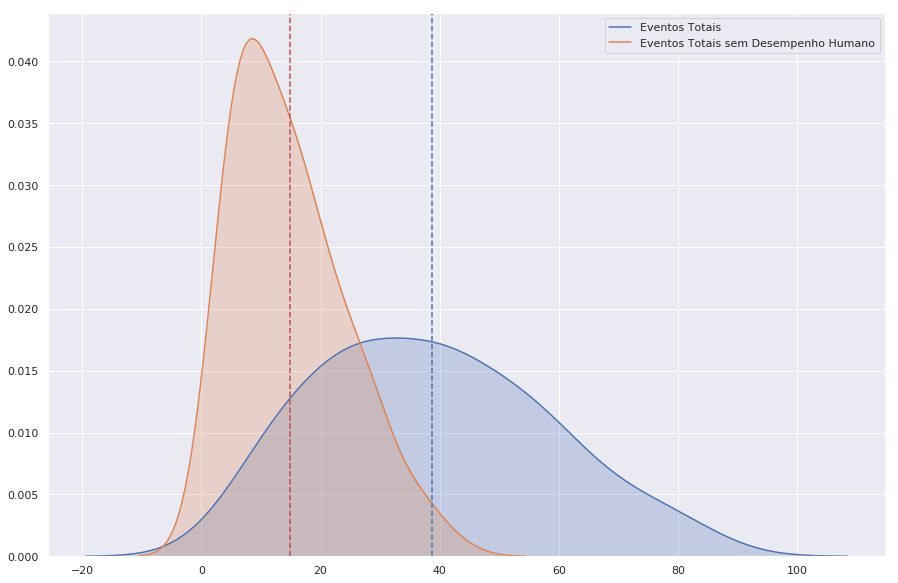

In [0]:
from scipy import stats

print(lista_eventos_totais)
print(lista_eventos_sem_desemp_hum_total)
print(stats.ttest_ind(lista_eventos_totais,lista_eventos_sem_desemp_hum_total))

sns.kdeplot(lista_eventos_totais, label='Eventos Totais', shade=True)
sns.kdeplot(lista_eventos_sem_desemp_hum_total, label='Eventos Totais sem Desempenho Humano', shade=True)

a = sum(lista_eventos_totais) / len(lista_eventos_totais)
plt.axvline(a, color="b", linestyle="--");

z = sum(lista_eventos_sem_desemp_hum_total) / len(lista_eventos_sem_desemp_hum_total)
plt.axvline(z, color="r", linestyle="--");